In [48]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import statsmodels.api as sm
from itertools import cycle
from statsmodels.stats.diagnostic import breaks_cusumolsresid
warnings.filterwarnings("ignore")


In [49]:
# Считаываем данные из собранного файла
df = pd.read_excel('Цены ВБ.xlsx', skiprows=2)
df["Дата"] = pd.to_datetime(df["Дата"])

df.set_index("Дата", inplace=True)

df.drop(columns=[171289236], inplace=True) 

df.loc[df[249820881] == 'Замена товара 171289236', 249820881] = 3198

df_cat = pd.read_excel('Цены ВБ.xlsx')
df_cat = df_cat.loc[:,~(df_cat==171289236).any()]
col =[]
categories = list(df_cat.columns)
categories = list(filter(lambda x: 'Unnamed' not in x, categories))
categories=categories[1::]

for i in range(6):
    if i == 0:
        col+=[categories[i]]*20
    else:
        col+=[categories[i]]*25
catagories_colums = col


df_goods = pd.read_excel('Цены ВБ.xlsx', skiprows = 1)
df_goods = df_goods.loc[:,~(df_goods==171289236).any()]
good =[]
goods = list(df_goods.columns)
goods = list(filter(lambda x: 'Unnamed' not in x, goods))
goods=goods[1::]
for i in range(29):
    good+=[goods[i]]*5
goods_columns = good


data={'Категория':catagories_colums,
      'Товар':goods_columns,
      'Артикул': list(df.columns)

}
df_catalog = pd.DataFrame(data)



# Шаг 5. Визуализация

Построим таблицу с процентными изменениями цен 

In [50]:
df_percent_change = df.pct_change()
df_percent_change = df_percent_change.iloc[1:]
df_percent_change

277503519  278324976  248946359  306096104  255796969  \
Дата                                                                         
2025-02-17 15:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 16:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 17:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 18:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 19:00:00        0.0        0.0        0.0        0.0        0.0   
...                        ...        ...        ...        ...        ...   
2025-03-09 09:00:00        0.0        0.0        0.0        0.0        0.0   
2025-03-09 10:00:00        0.0        0.0        0.0        0.0        0.0   
2025-03-09 11:00:00        0.0        0.0        0.0        0.0        0.0   
2025-03-09 12:00:00        0.0        0.0        0.0        0.0        0.0   
2025-03-09 13:00:00        0.0        0.0        0.0        0.0        0.0   

                     182404057  90116547   153088675  153203825  270872197  \
Дата                                                                         
2025-02-17 15:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 16:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 17:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 18:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 19:00:00        0.0        0.0        0.0        0.0        0.0   
...                        ...        ...        ...        ...        ...   
2025-03-09 09:00:00        0.0        0.0        0.0        0.0        0.0   
2025-03-09 10:00:00        0.0        0.0        0.0        0.0        0.0   
2025-03-09 11:00:00        0.0        0.0        0.0        0.0        0.0   
2025-03-09 12:00:00        0.0        0.0        0.0        0.0        0.0   
2025-03-09 13:00:00        0.0        0.0        0.0        0.0        0.0   

                     ...  209240844  216291819  156970391  209242389  \
Дата                 ...                                               
2025-02-17 15:00:00  ...   0.000000   0.000000   0.000000   0.000000   
2025-02-17 16:00:00  ...  -0.011494  -0.011544  -0.011457  -0.011019   
2025-02-17 17:00:00  ...   0.000000   0.000000   0.000000   0.000000   
2025-02-17 18:00:00  ...   0.000000   0.000000   0.000000   0.000000   
2025-02-17 19:00:00  ...   0.000000   0.000000   0.000000   0.000000   
...                  ...        ...        ...        ...        ...   
2025-03-09 09:00:00  ...   0.000000   0.000000   0.000000   0.000000   
2025-03-09 10:00:00  ...   0.000000   0.000000   0.000000   0.000000   
2025-03-09 11:00:00  ...   0.000000   0.000000   0.000000   0.000000   
2025-03-09 12:00:00  ...   0.000000   0.000000   0.000000   0.000000   
2025-03-09 13:00:00  ...   0.000000   0.000000   0.000000   0.000000   

                     234136855  9391510    18364130   309985228  15396161   \
Дата                                                                         
2025-02-17 15:00:00        0.0   0.000000   0.000000   0.000000   0.000000   
2025-02-17 16:00:00        0.0  -0.026699  -0.026699  -0.026393  -0.011111   
2025-02-17 17:00:00        0.0   0.000000   0.000000   0.000000   0.000000   
2025-02-17 18:00:00        0.0   0.000000   0.000000   0.000000   0.000000   
2025-02-17 19:00:00        0.0   0.000000   0.000000   0.000000   0.000000   
...                        ...        ...        ...        ...        ...   
2025-03-09 09:00:00        0.0   0.000000   0.000000   0.000000   0.000000   
2025-03-09 10:00:00        0.0   0.000000   0.000000   0.000000   0.000000   
2025-03-09 11:00:00        0.0   0.000000   0.000000   0.000000   0.000000   
2025-03-09 12:00:00        0.0   0.000000   0.000000   0.000000   0.000000   
2025-03-09 13:00:00        0.0   0.000000   0.000000   0.000000   0.000000   

                     126668875  
Дата  

Теперь приступим к визцуализации данных. Сначала построим *график изменения цен* и *тепловую карту* на основе корреляции процентного изменения цен для каждого товара 

Также отметим ***праздики***: 23 февраля (красная линия) и 8 марта (синяя линия), так как до и после них цены могут значительно изменяться

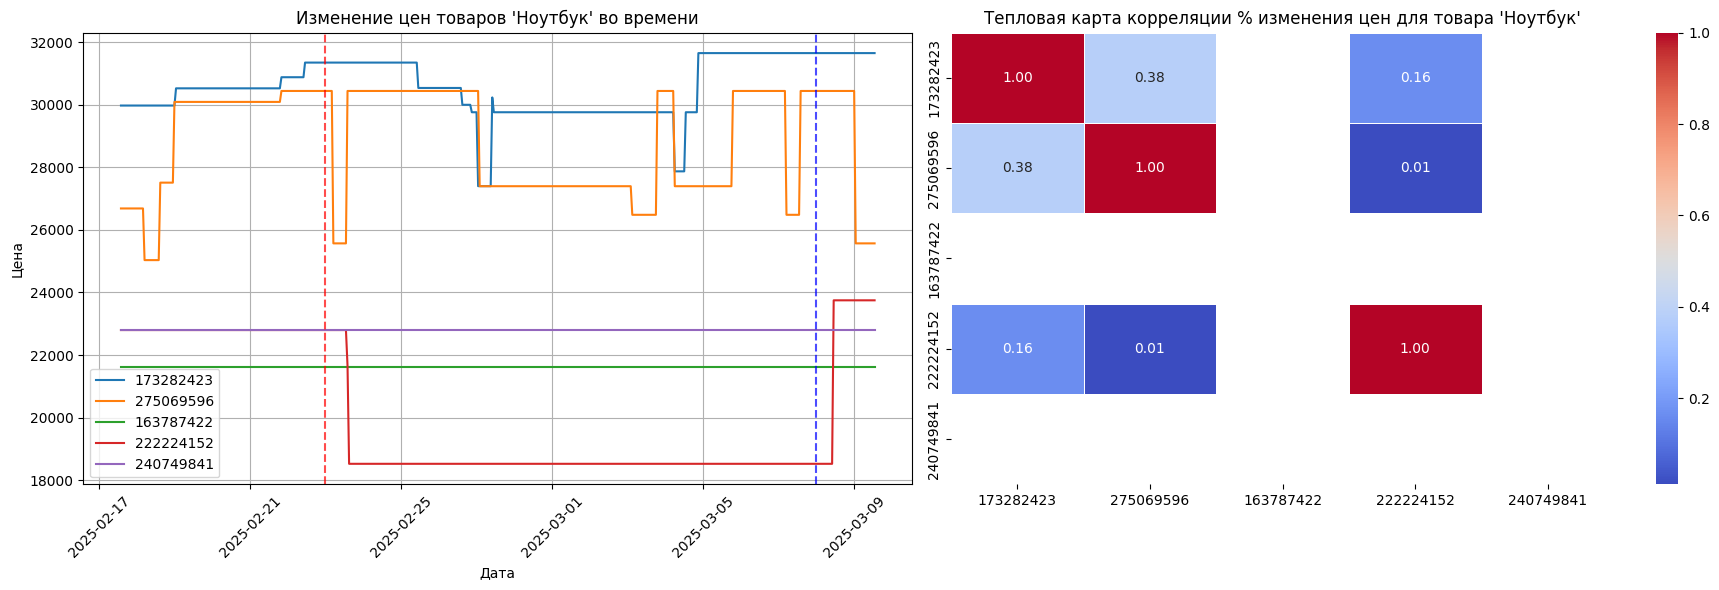

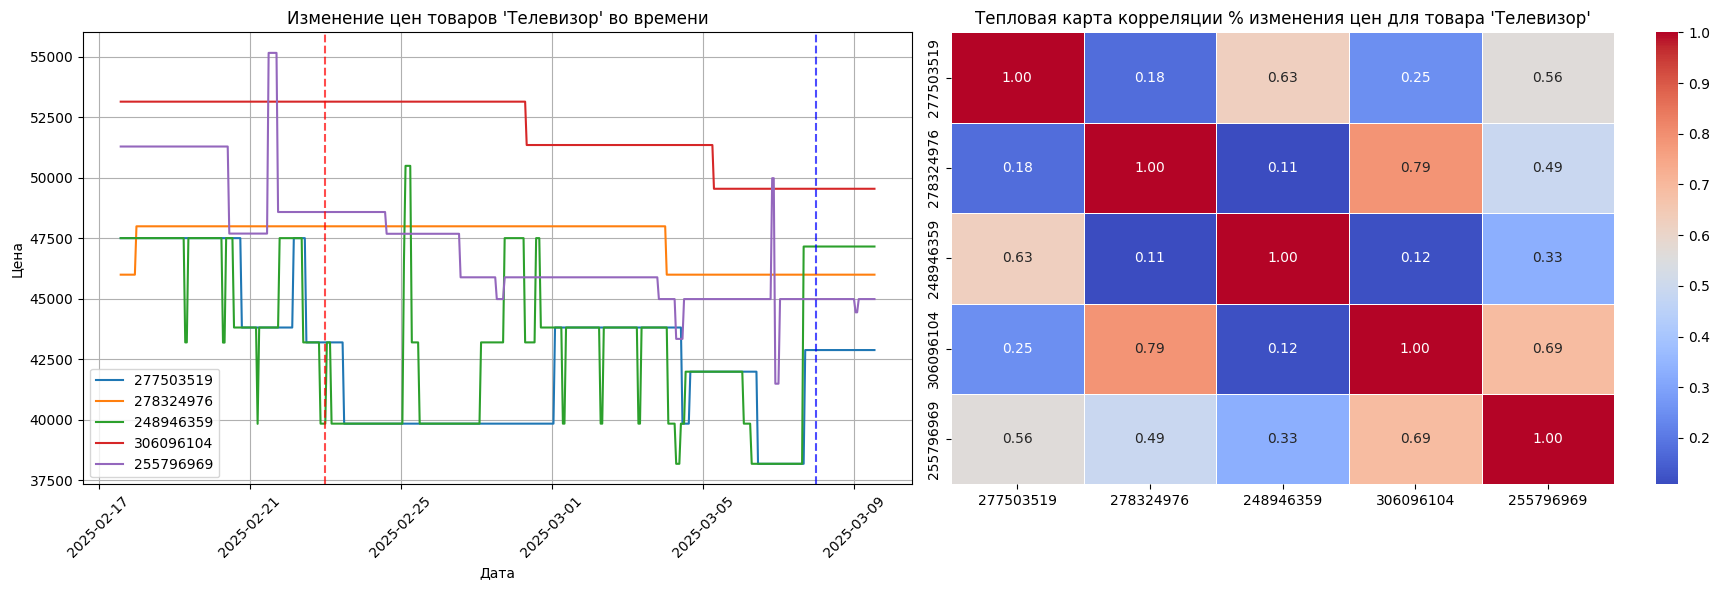

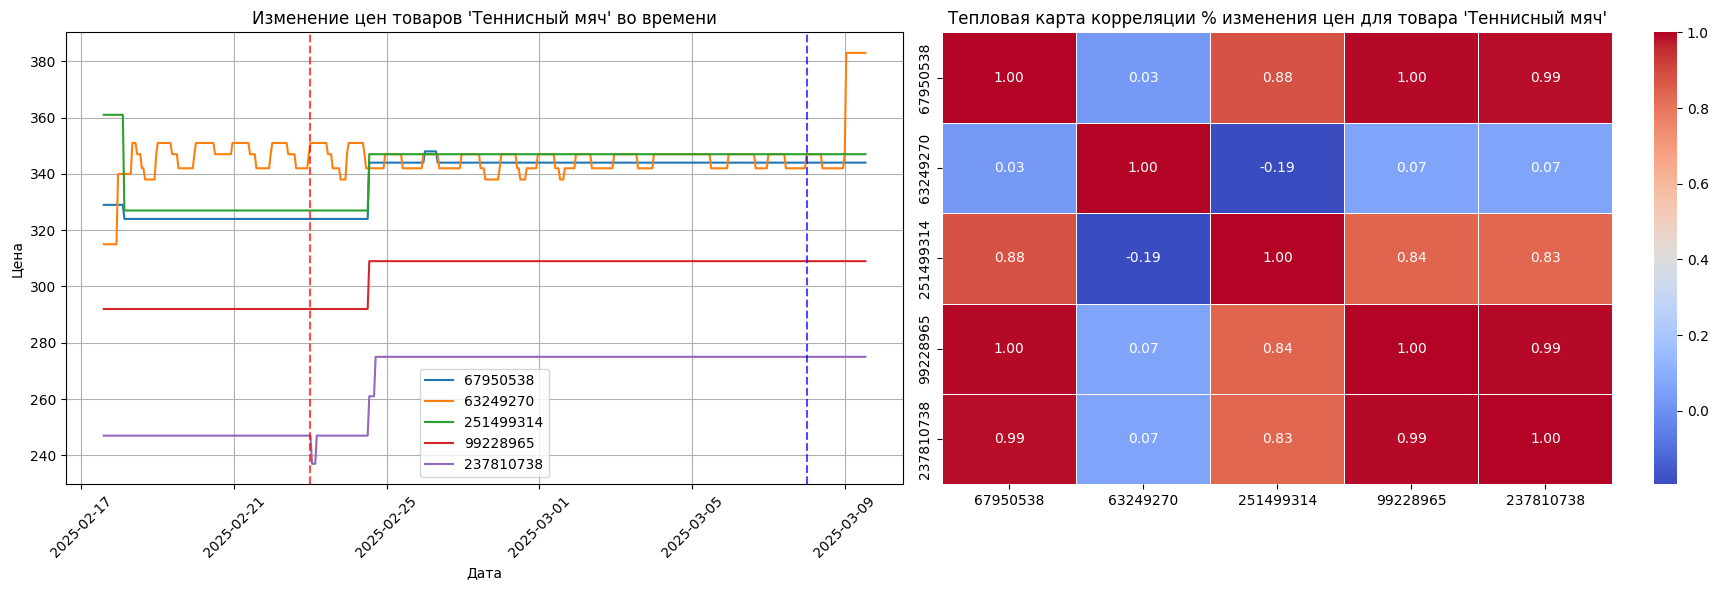

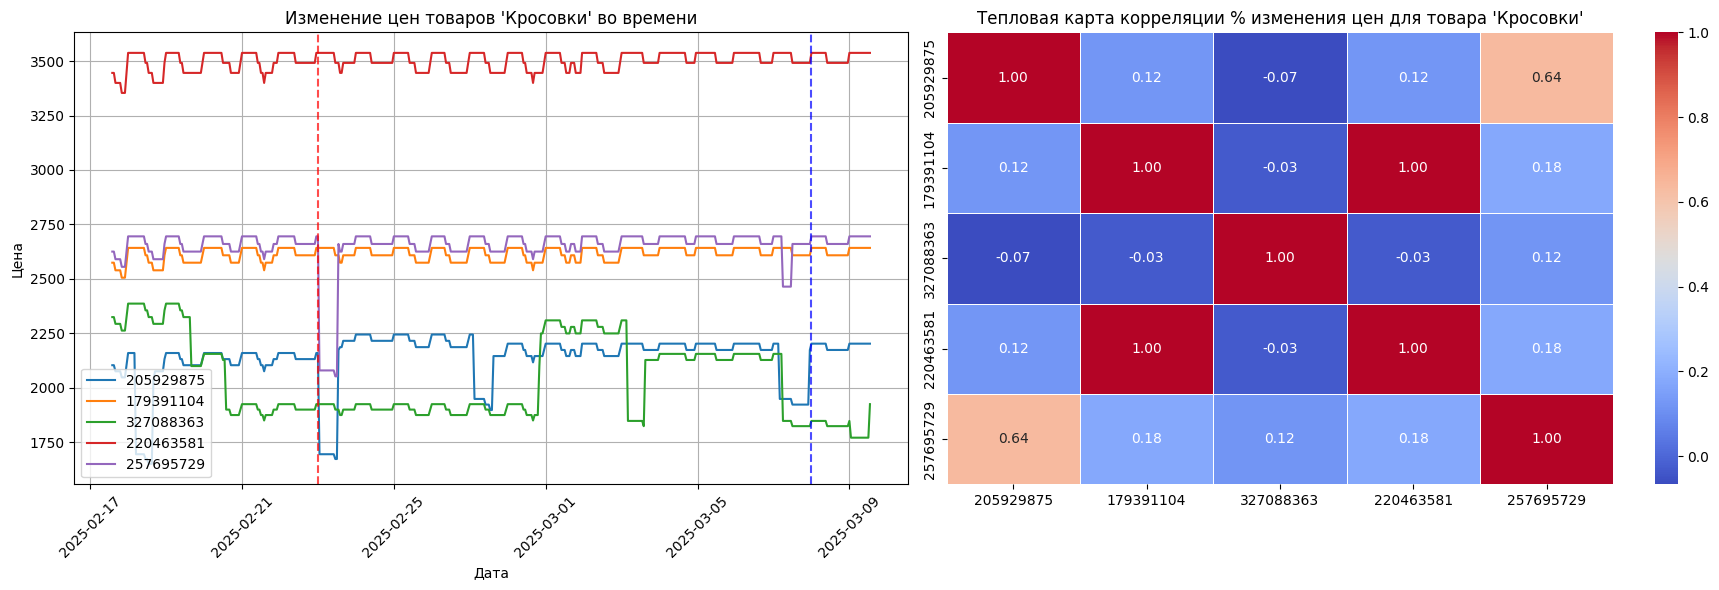

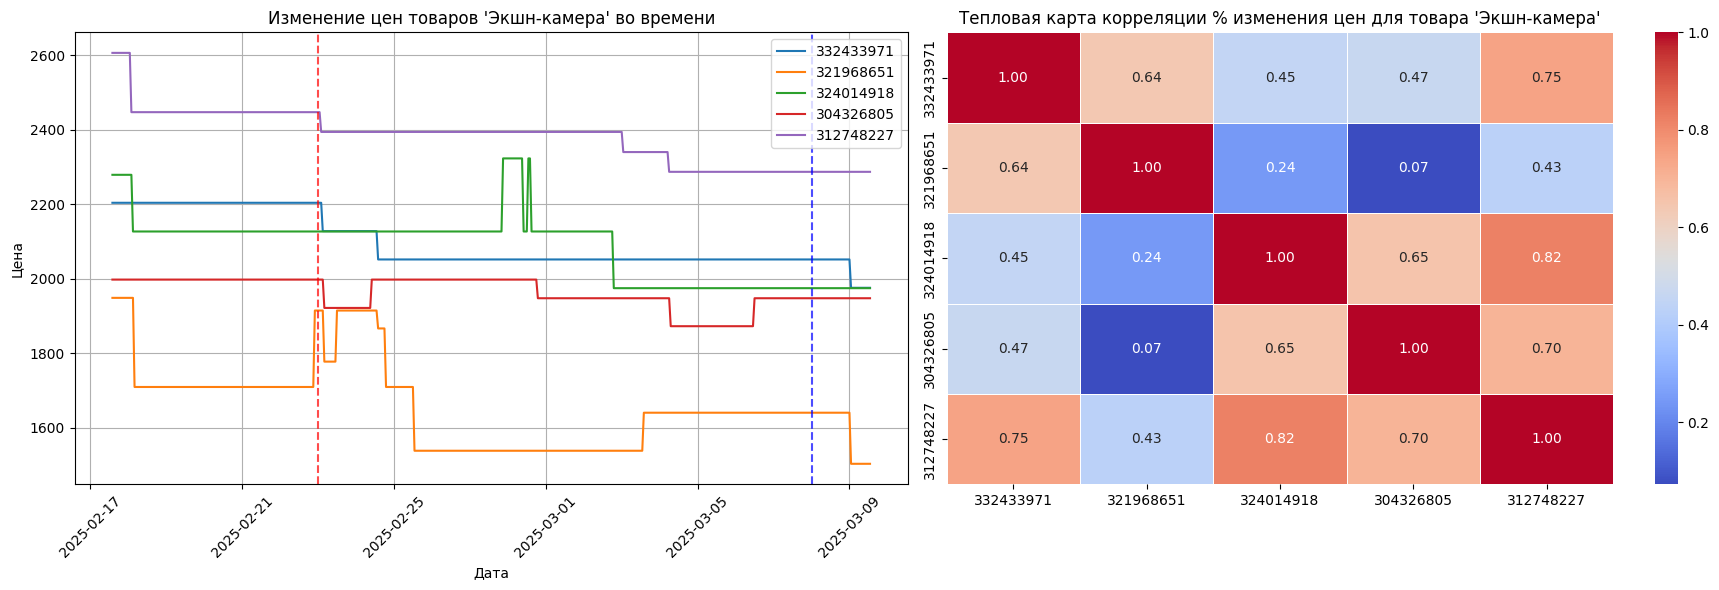

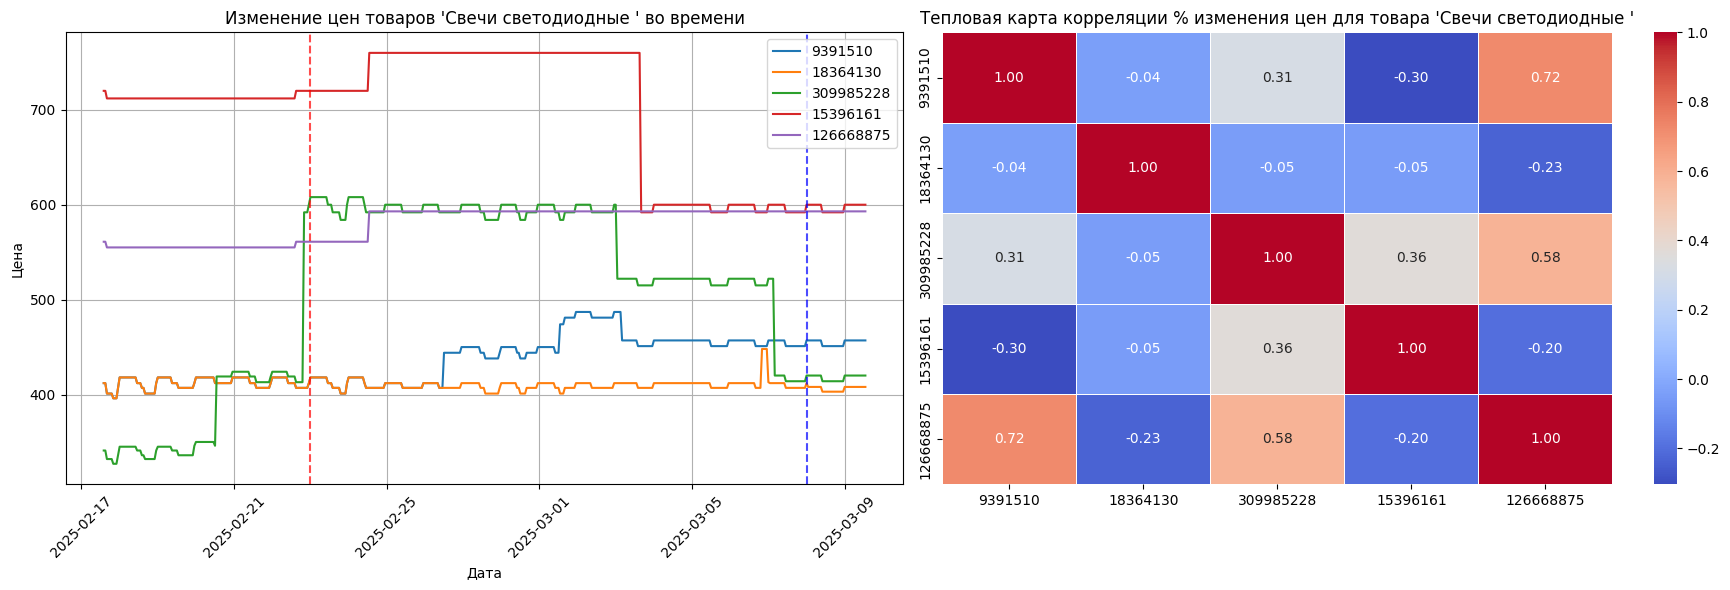

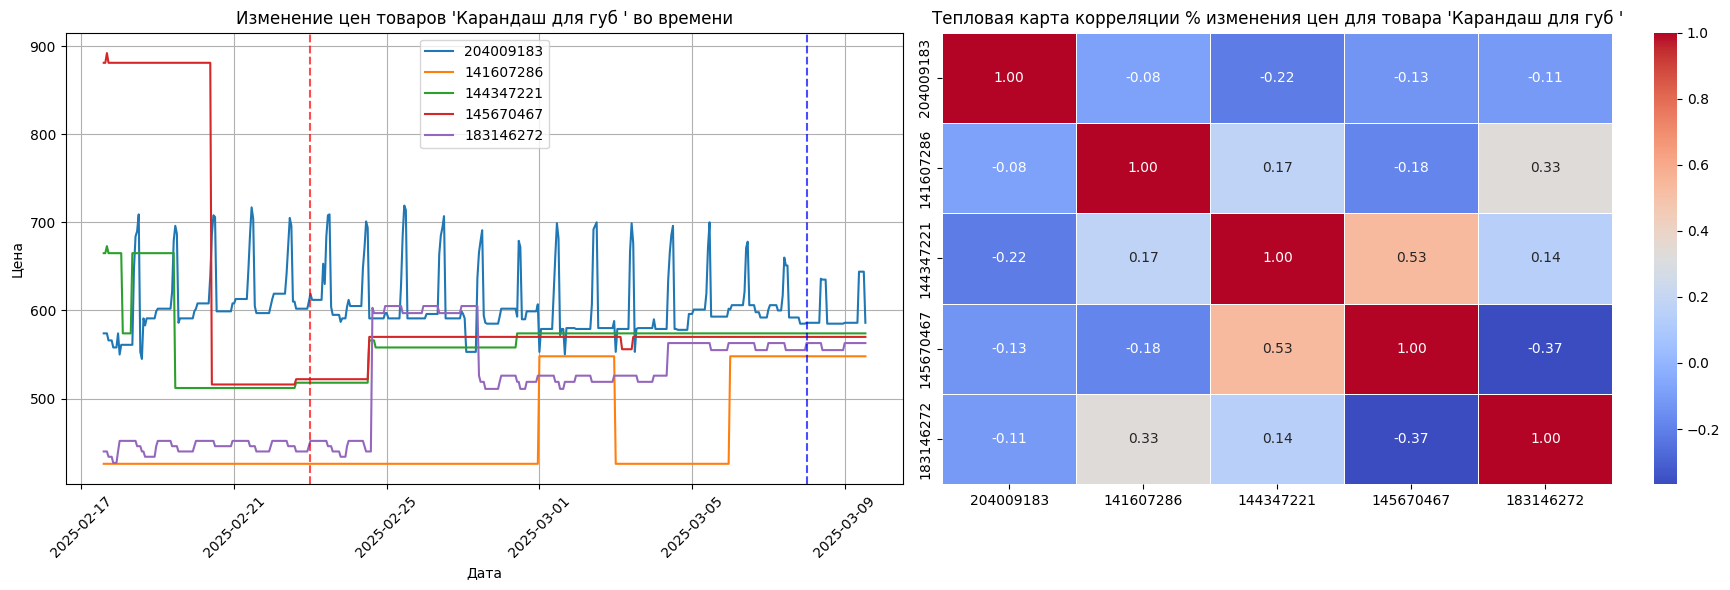

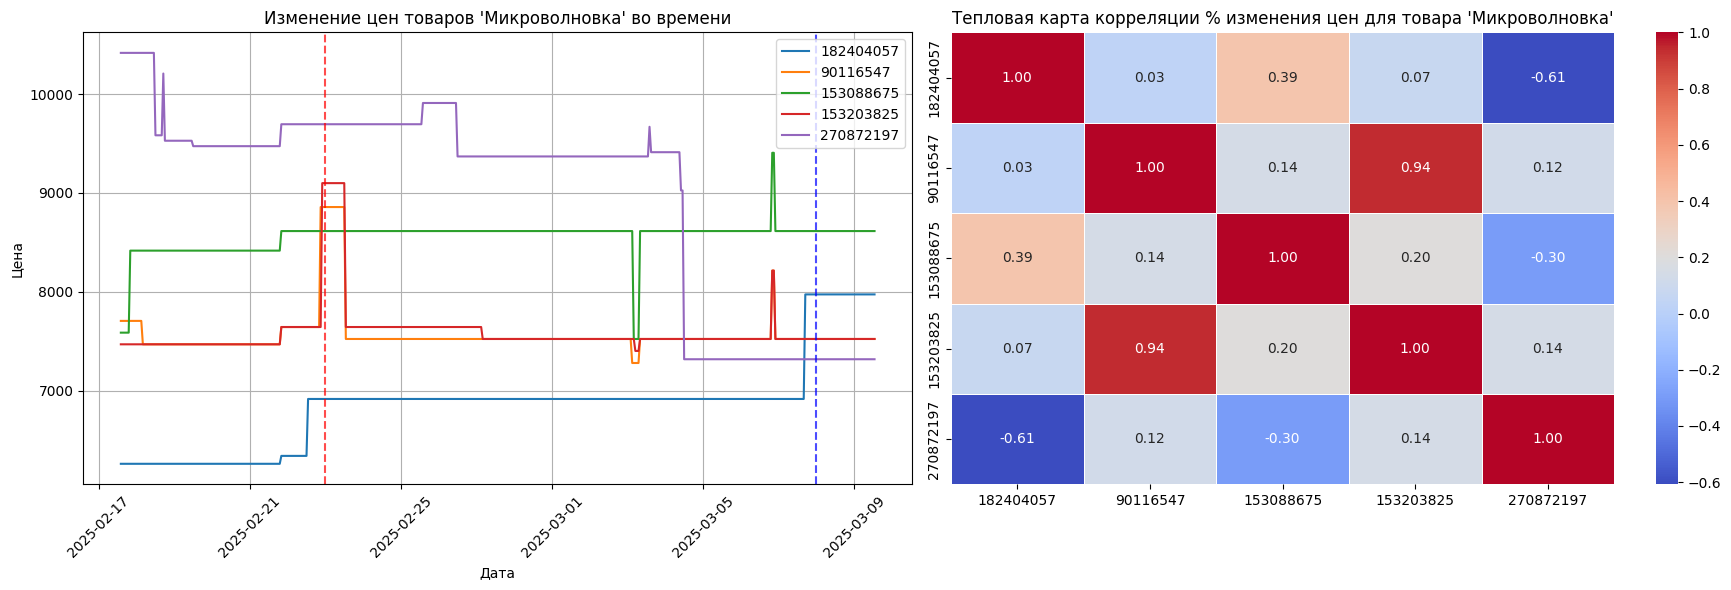

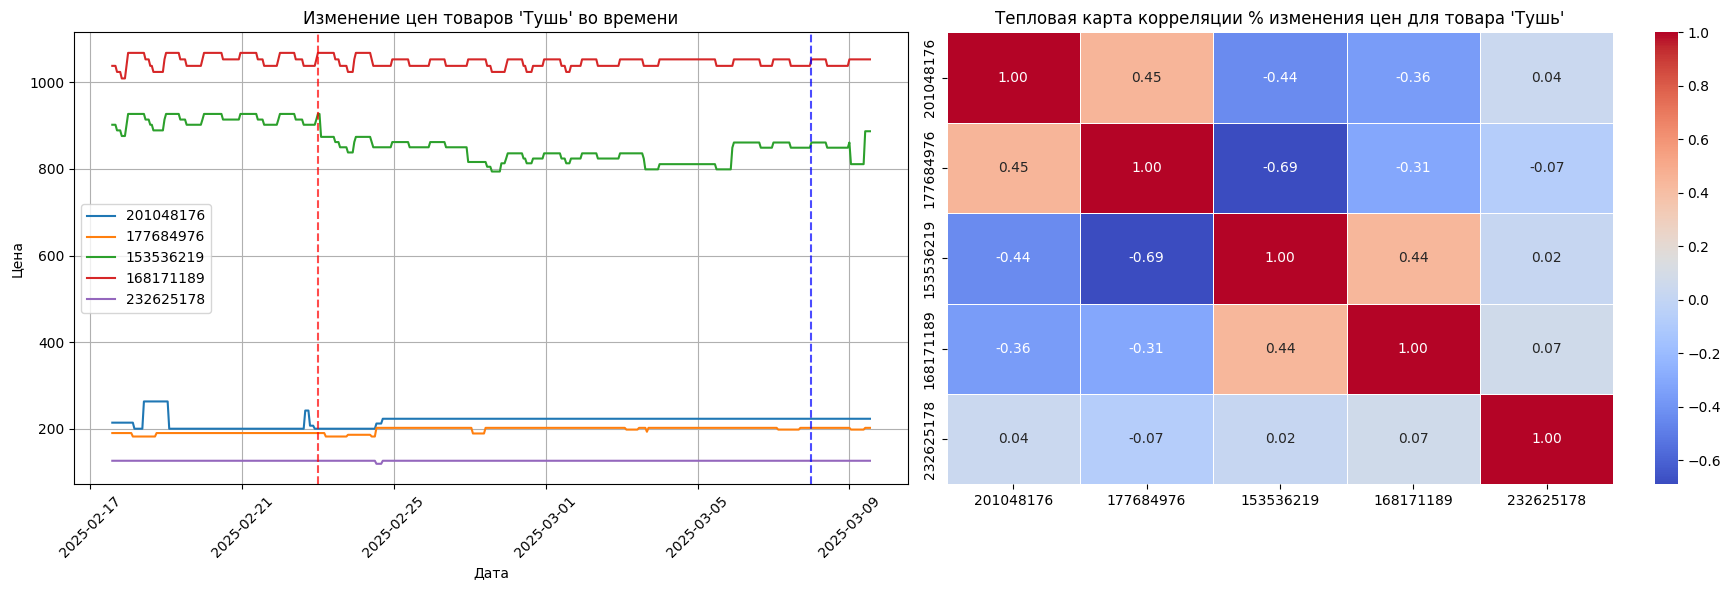

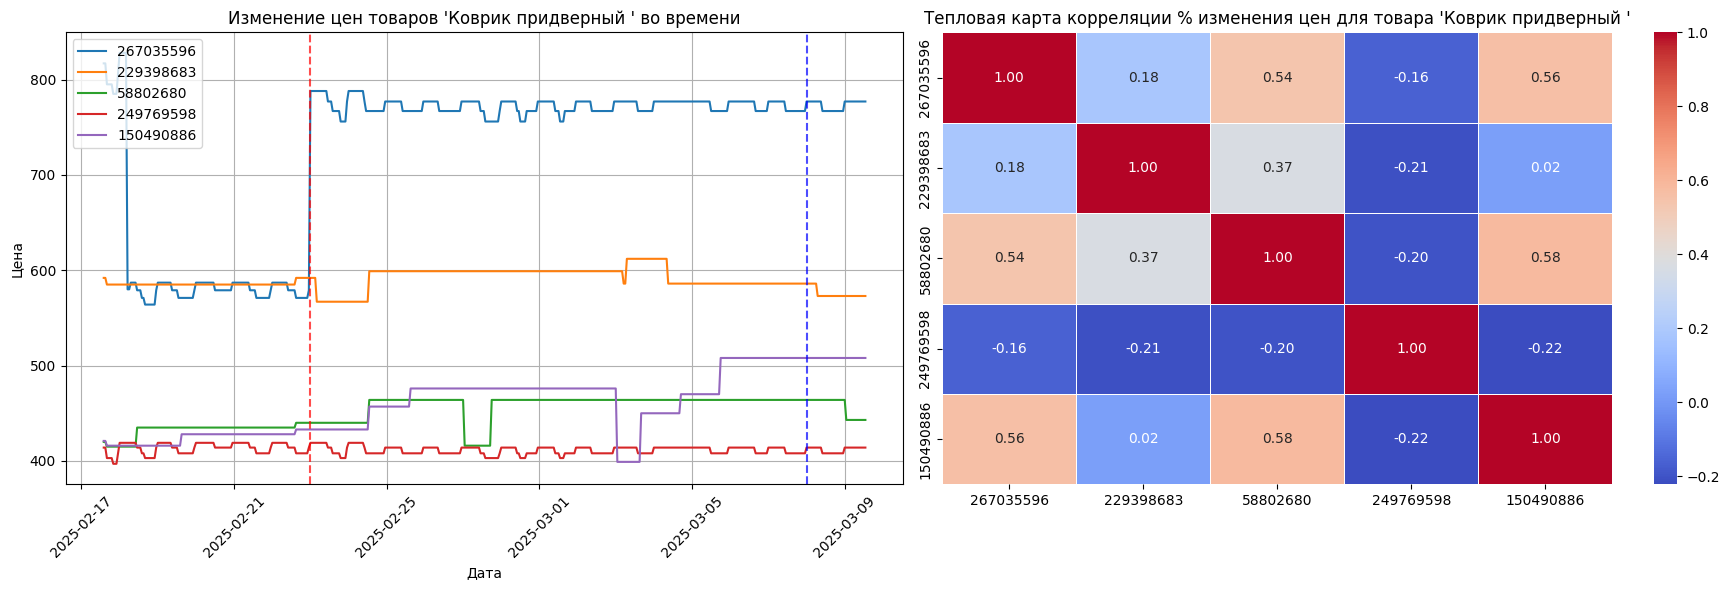

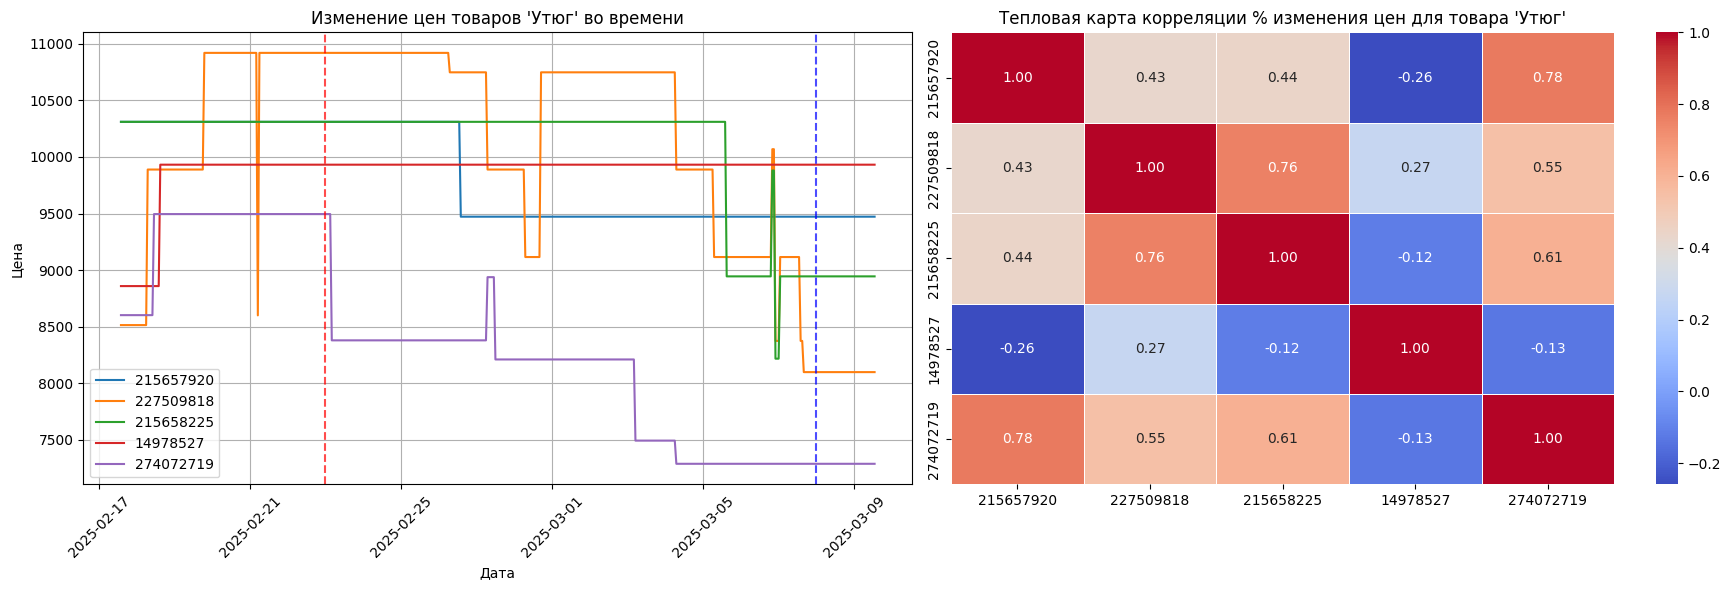

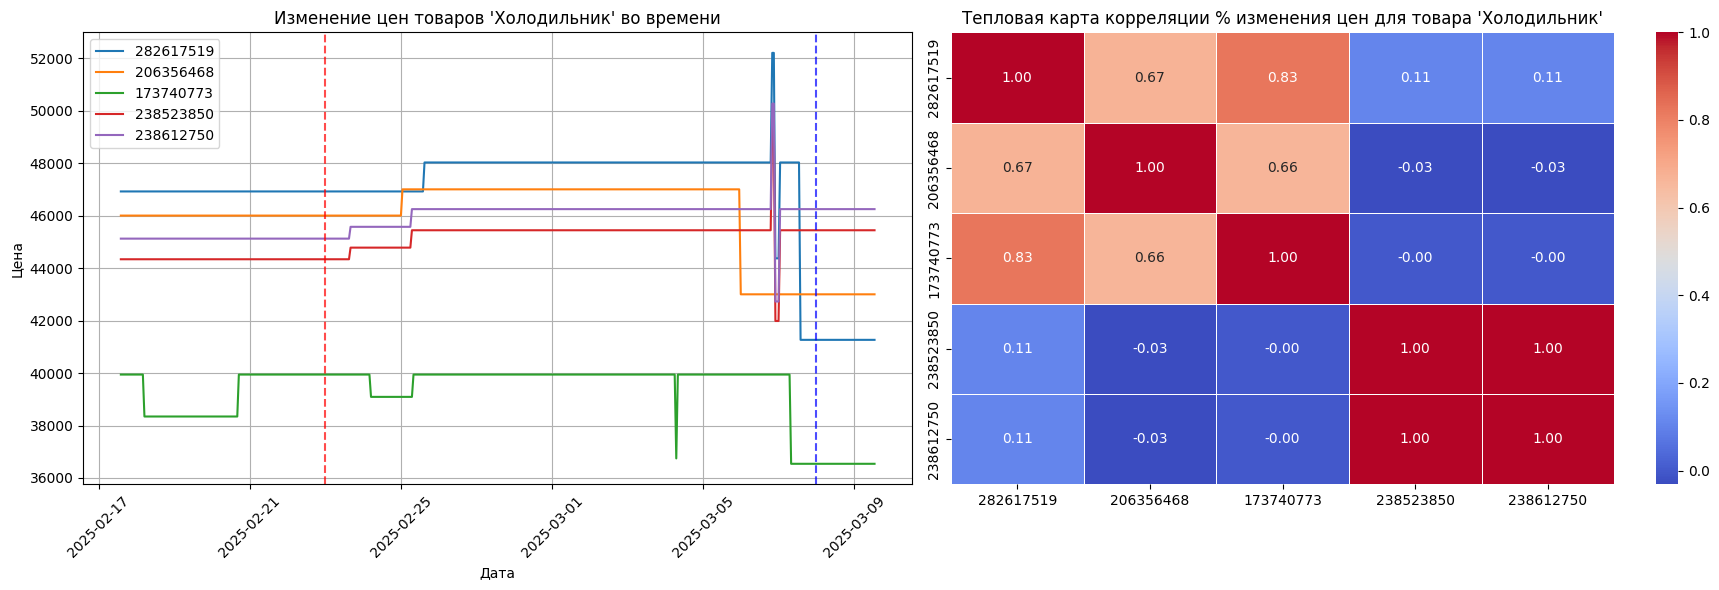

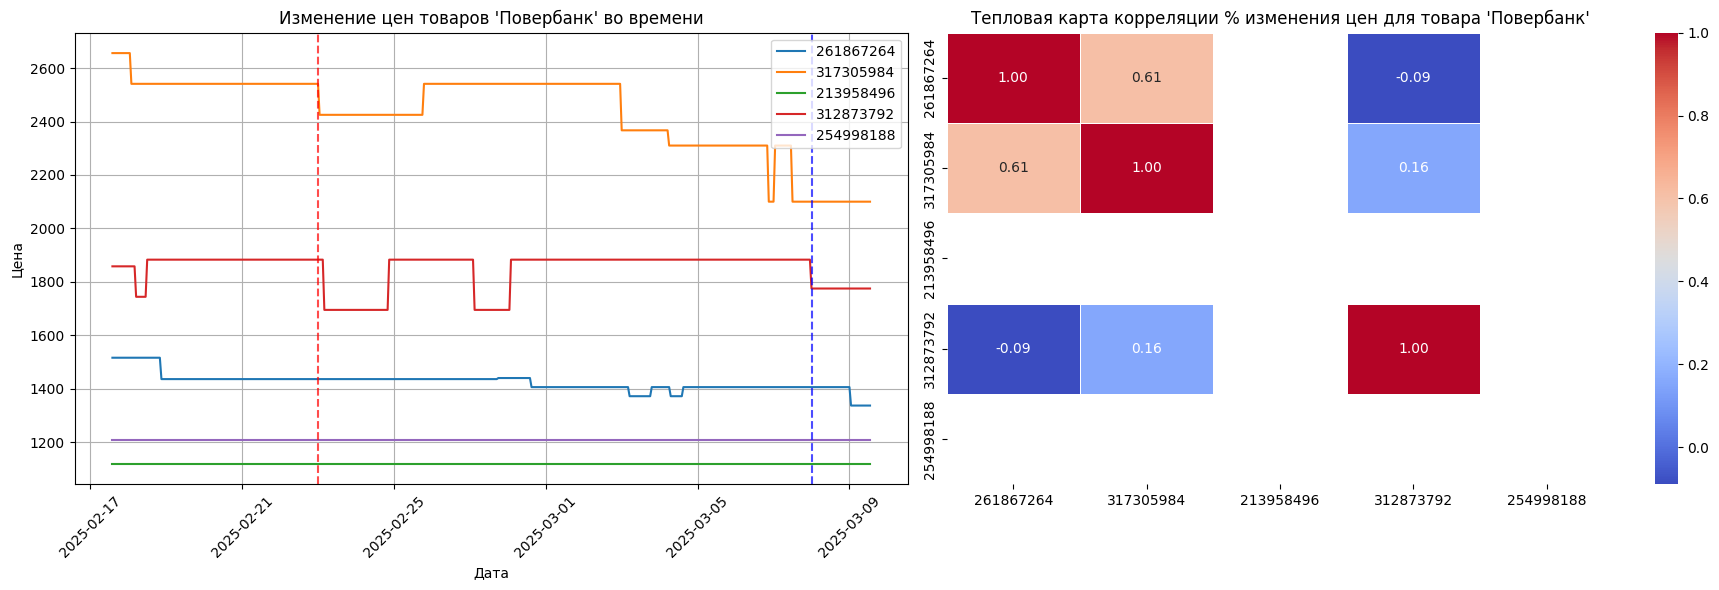

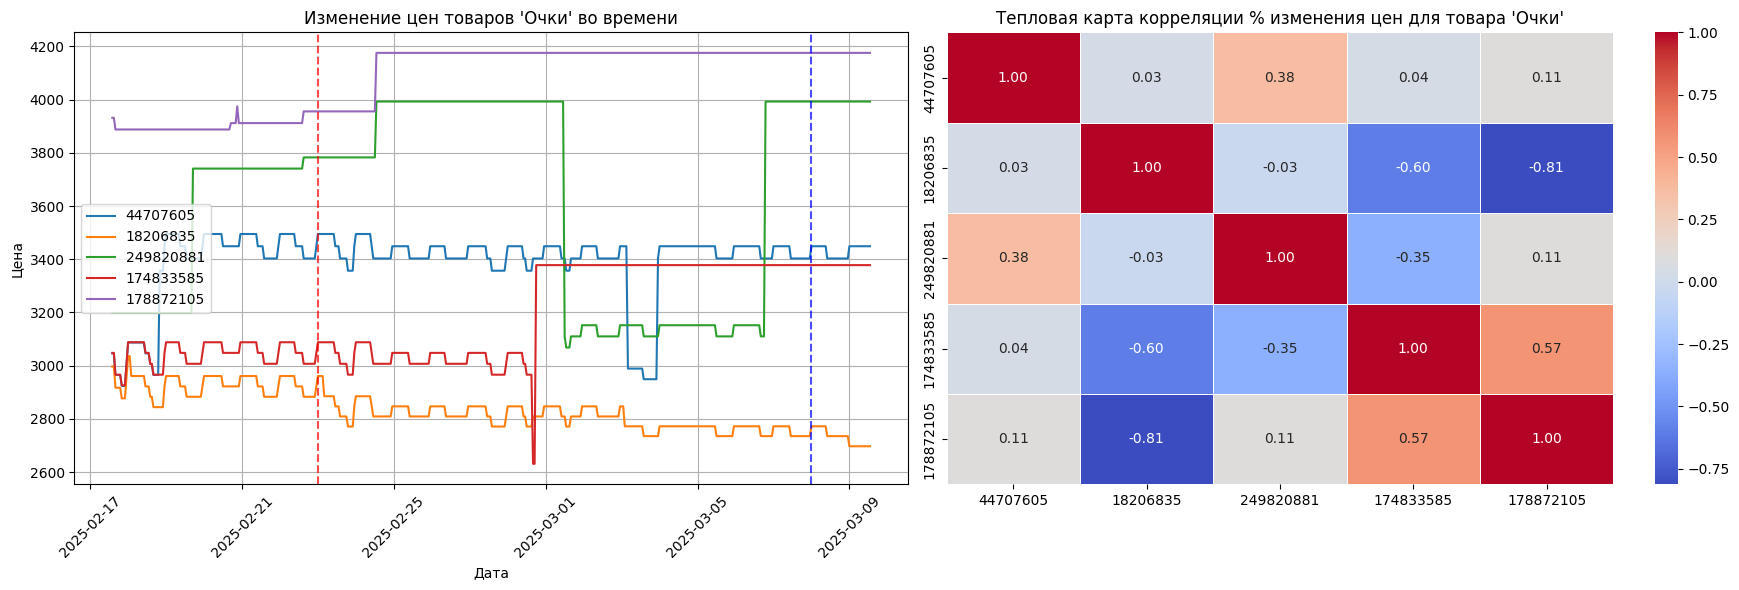

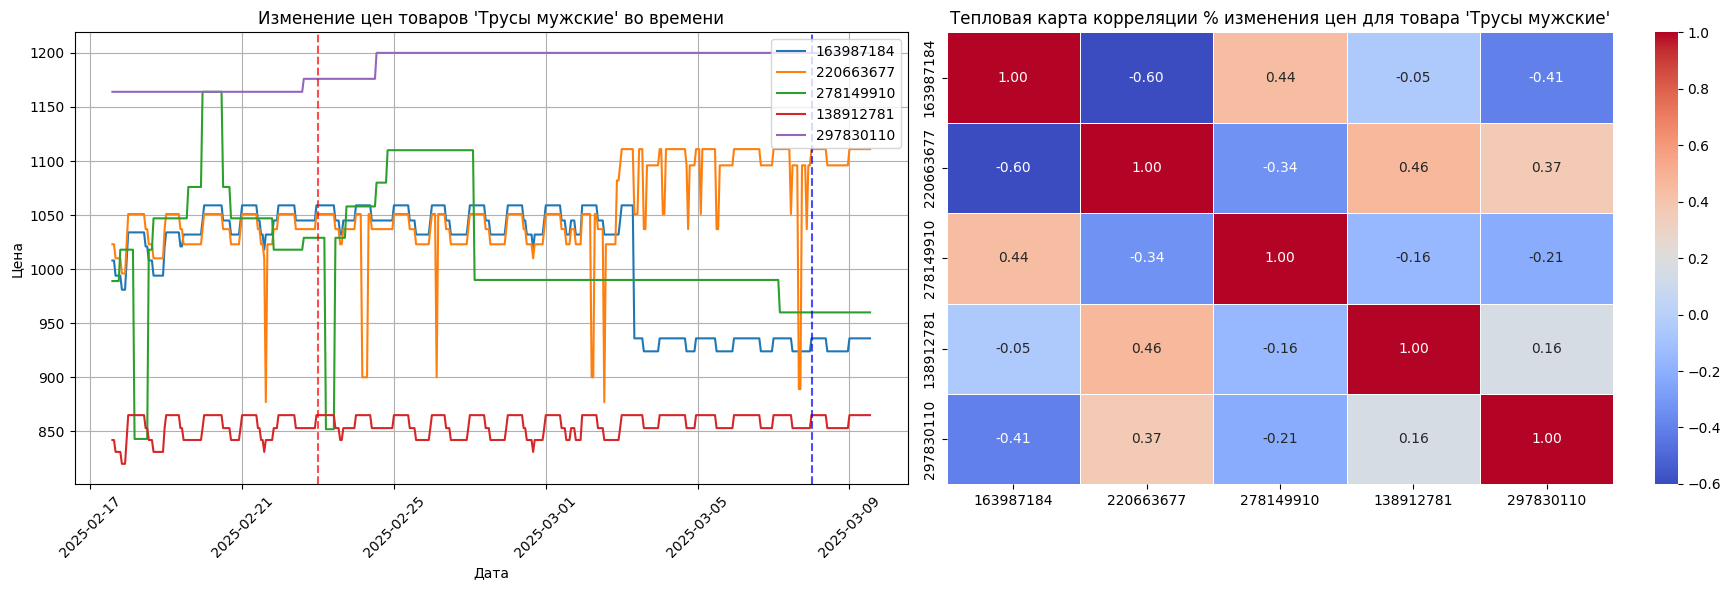

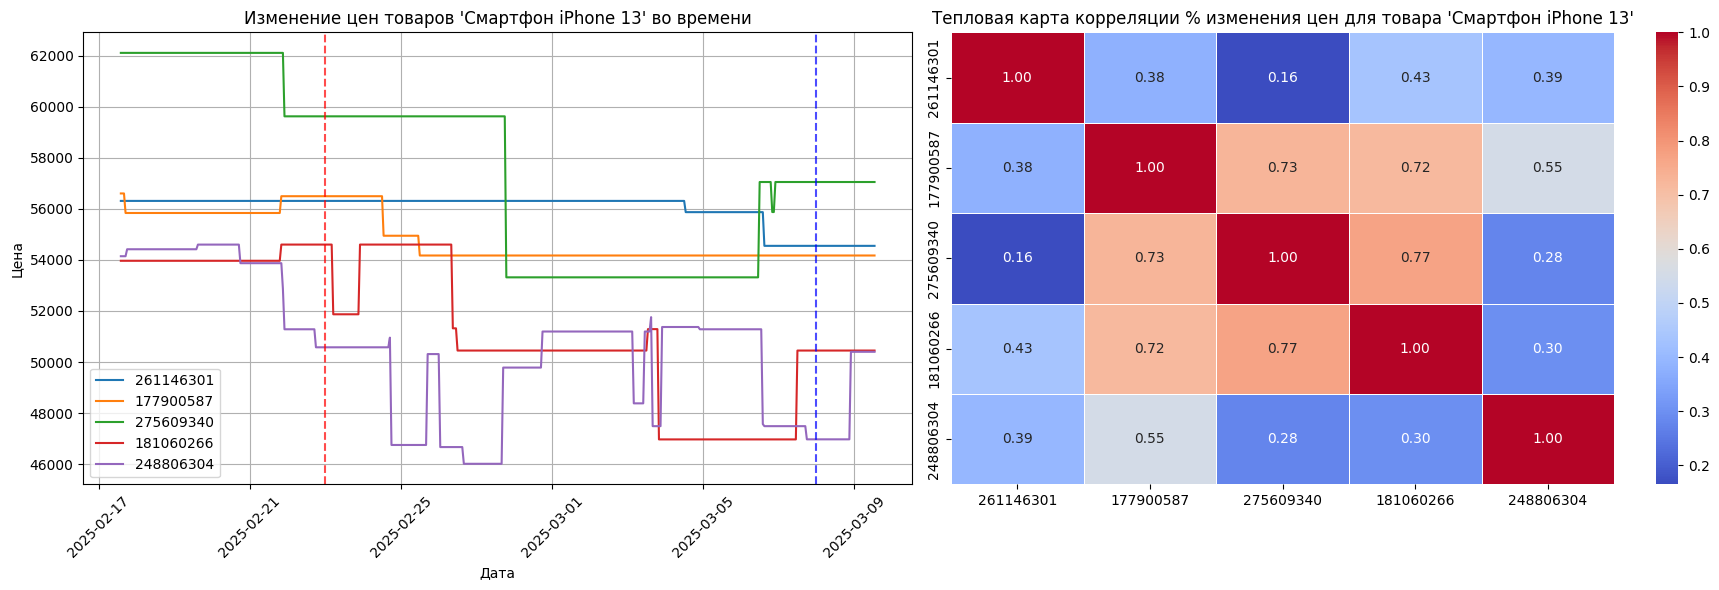

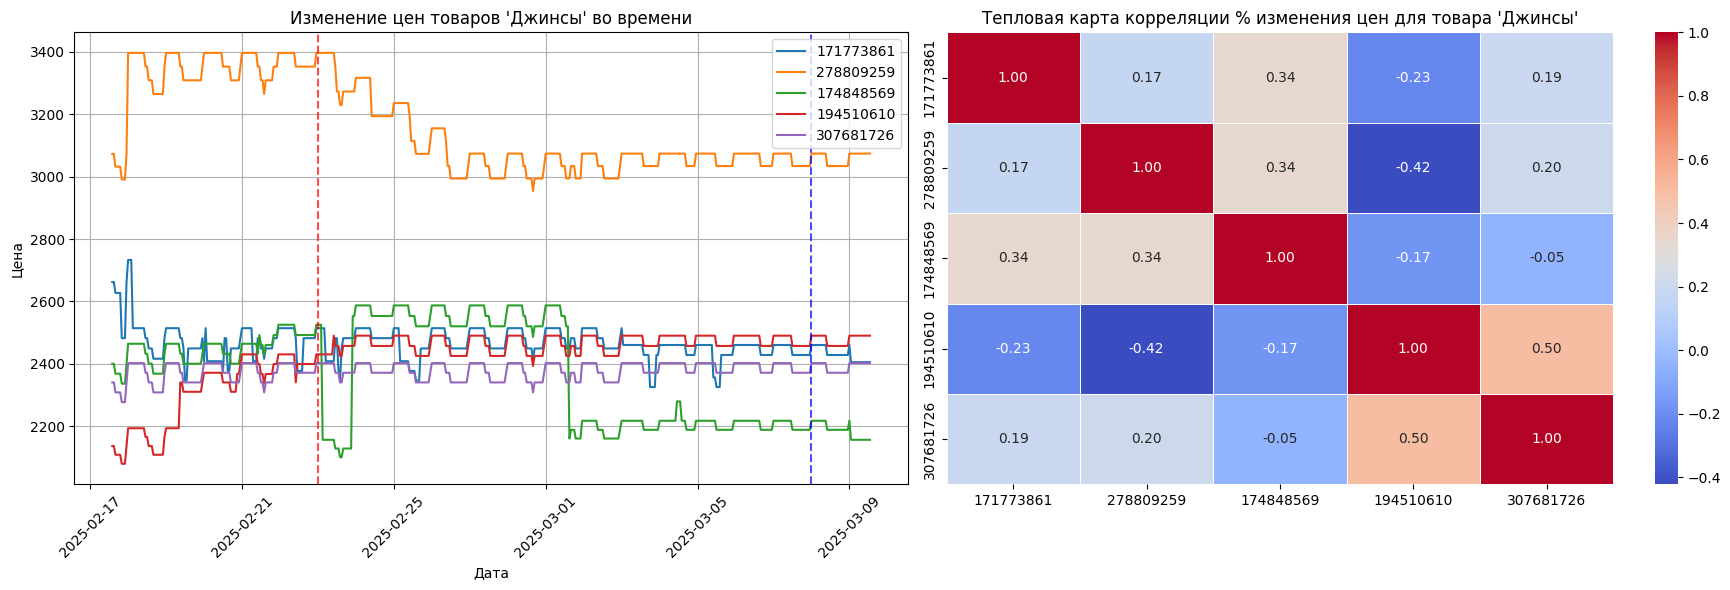

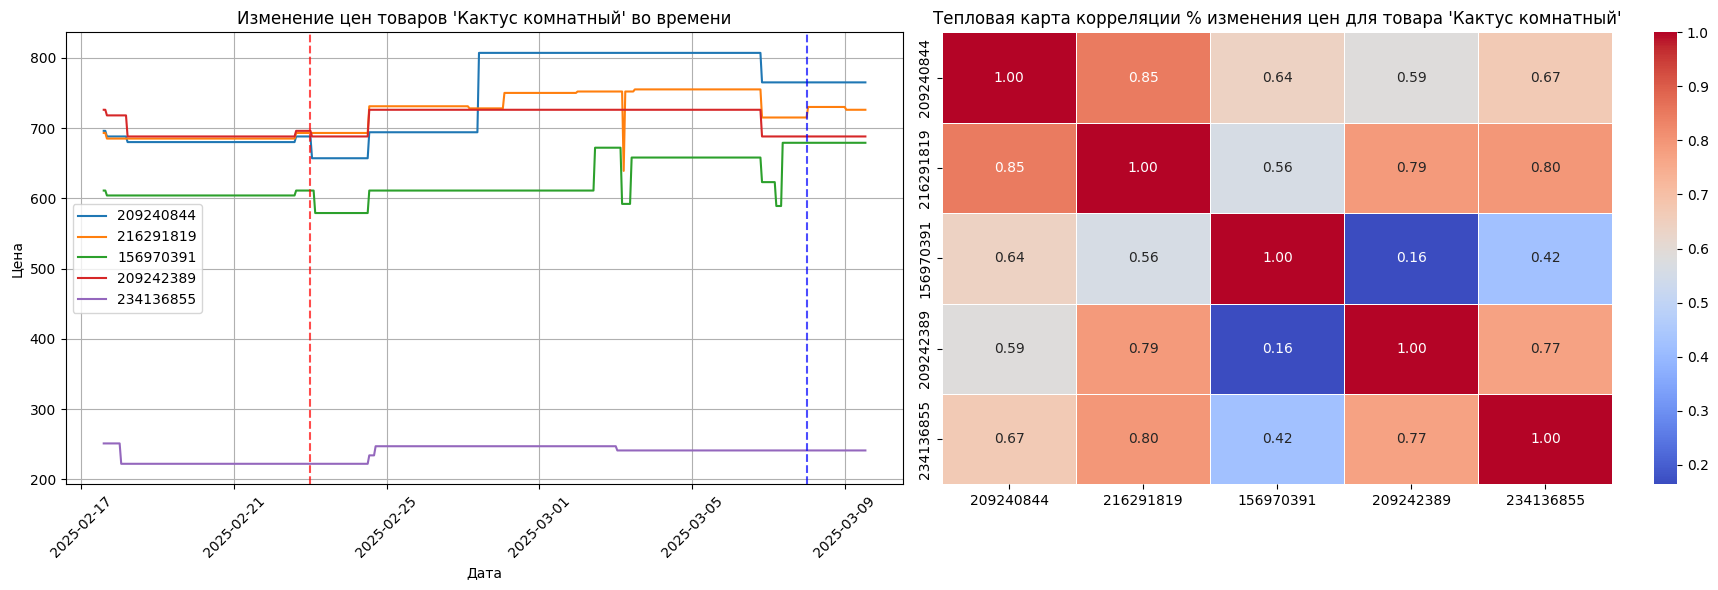

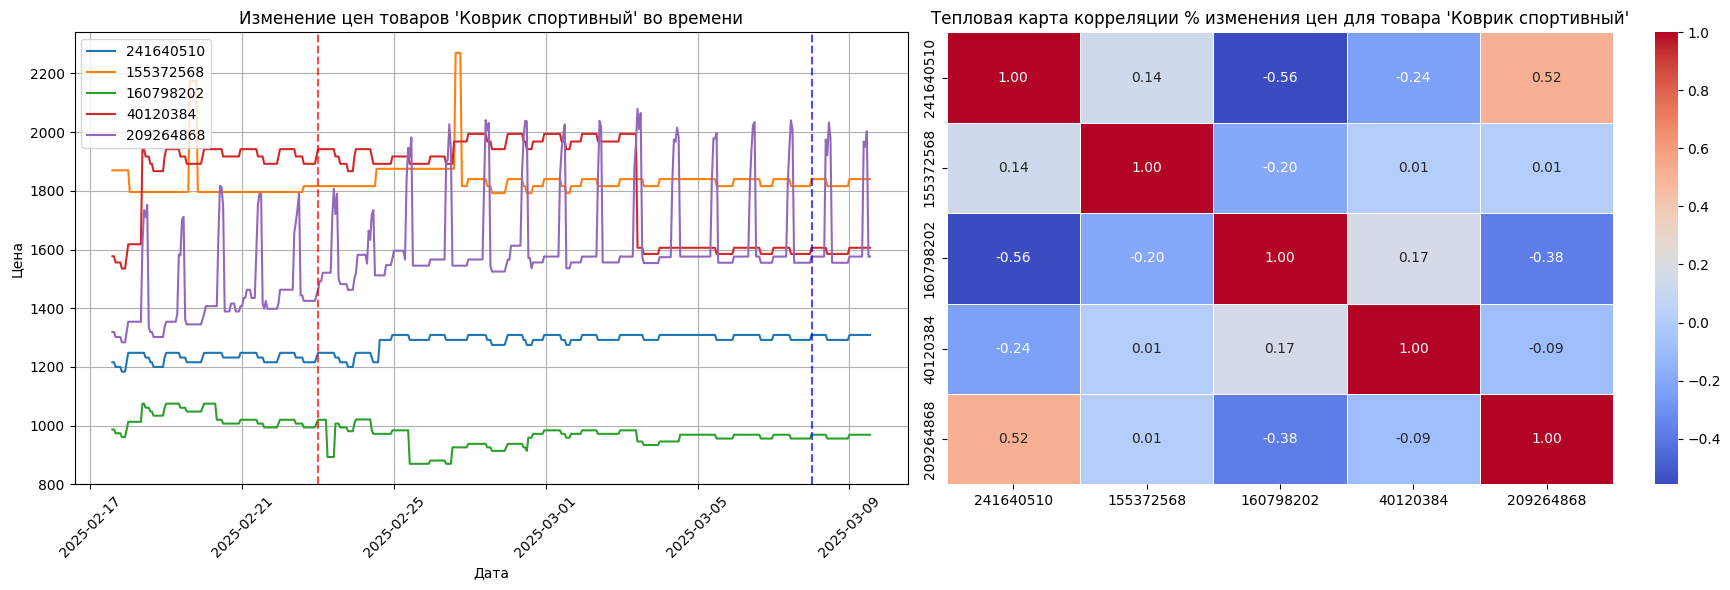

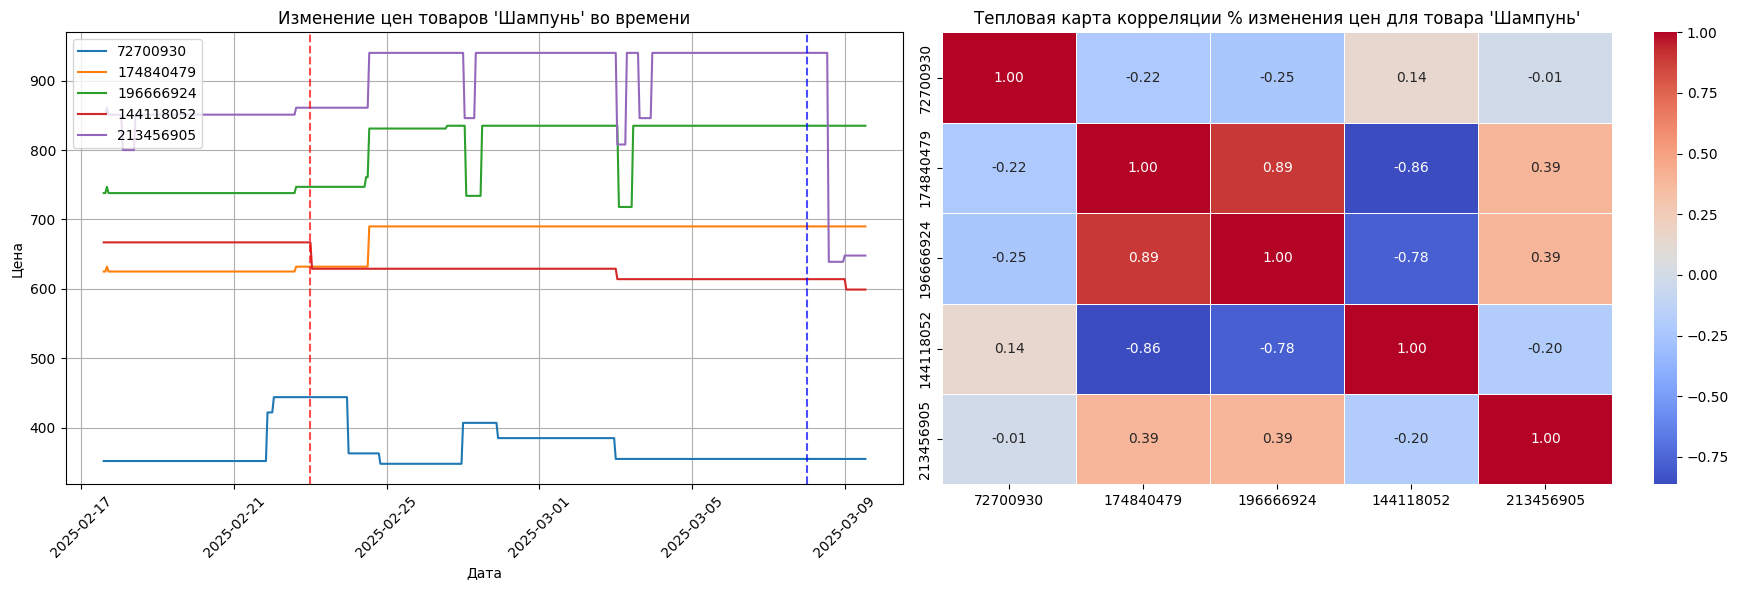

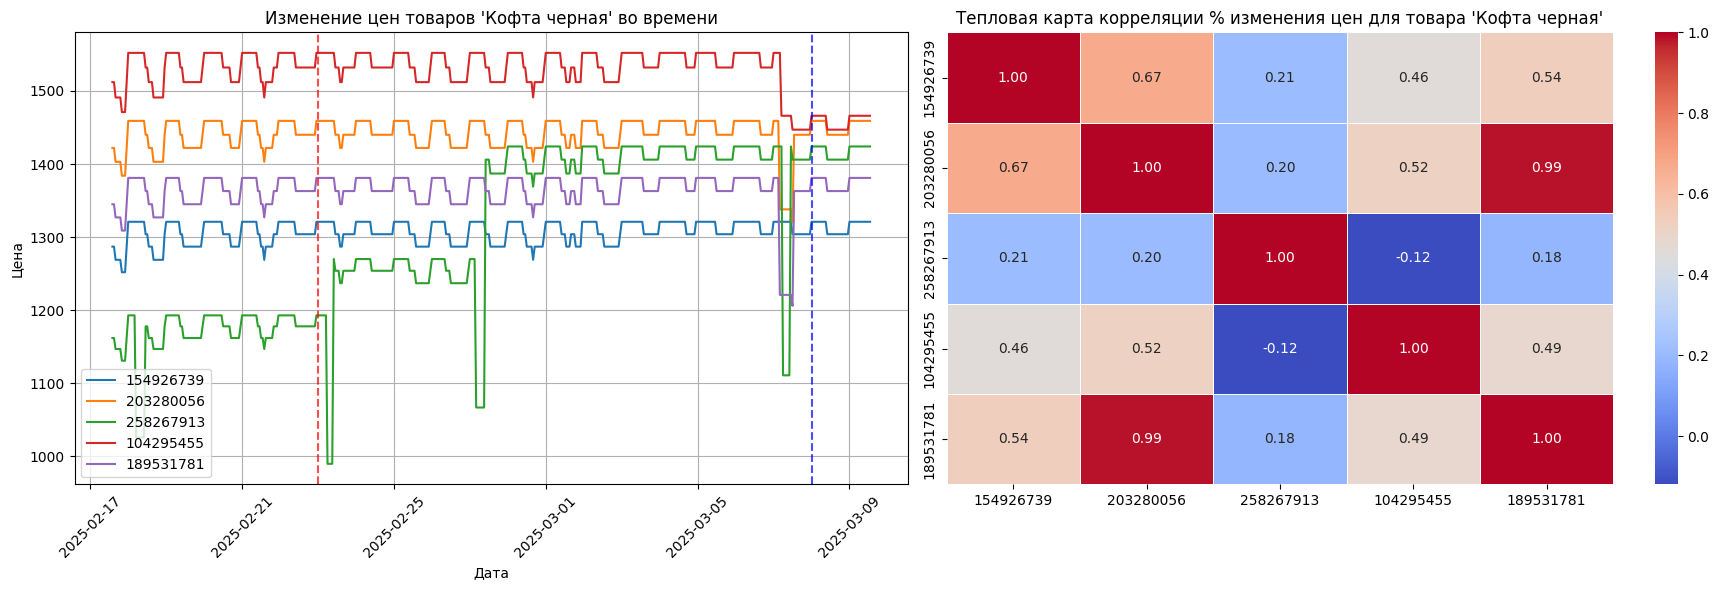

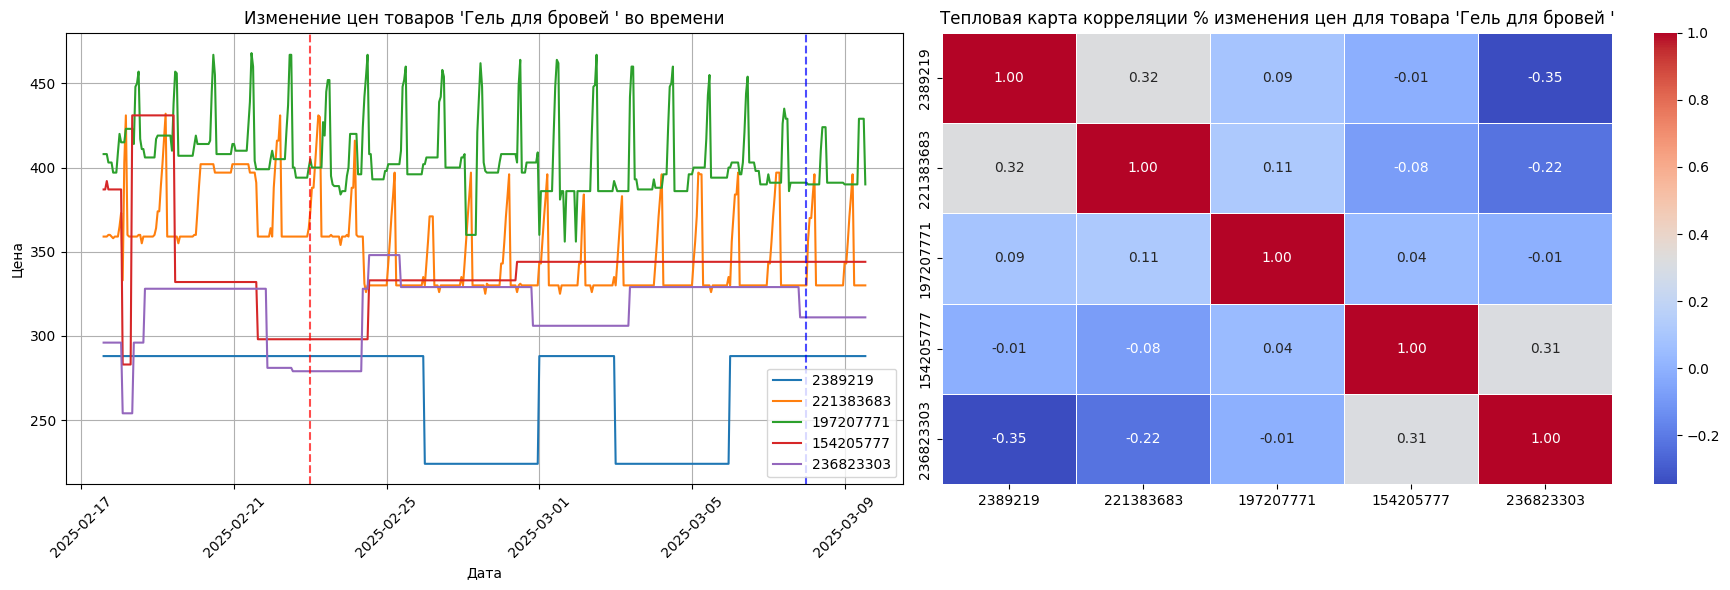

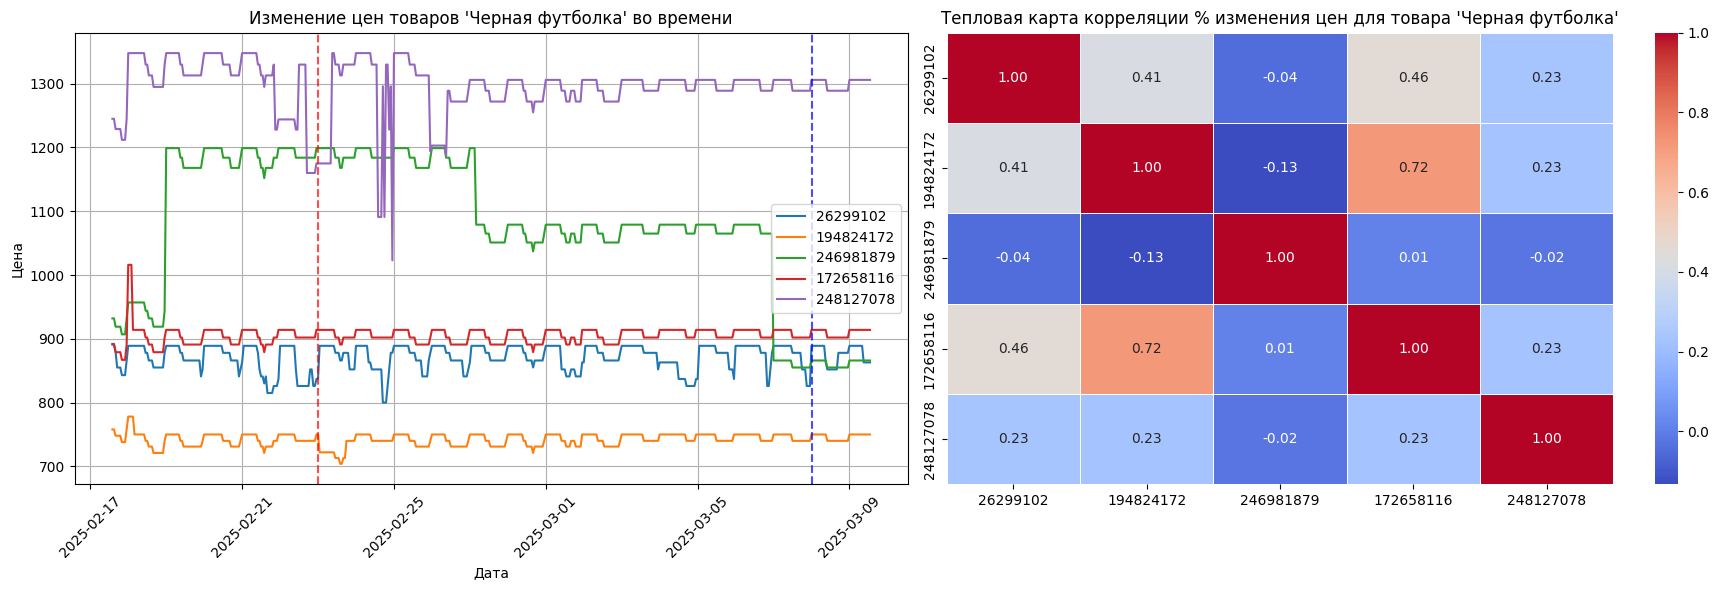

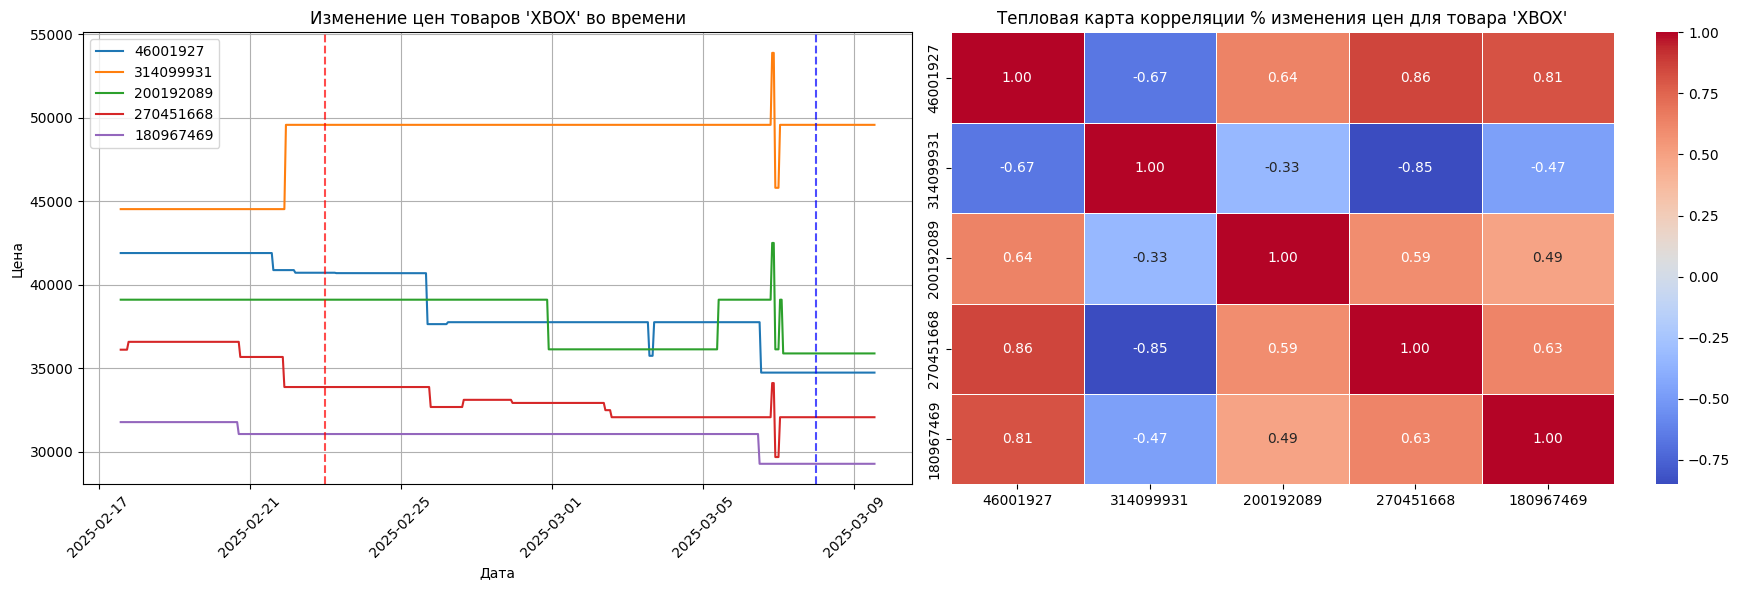

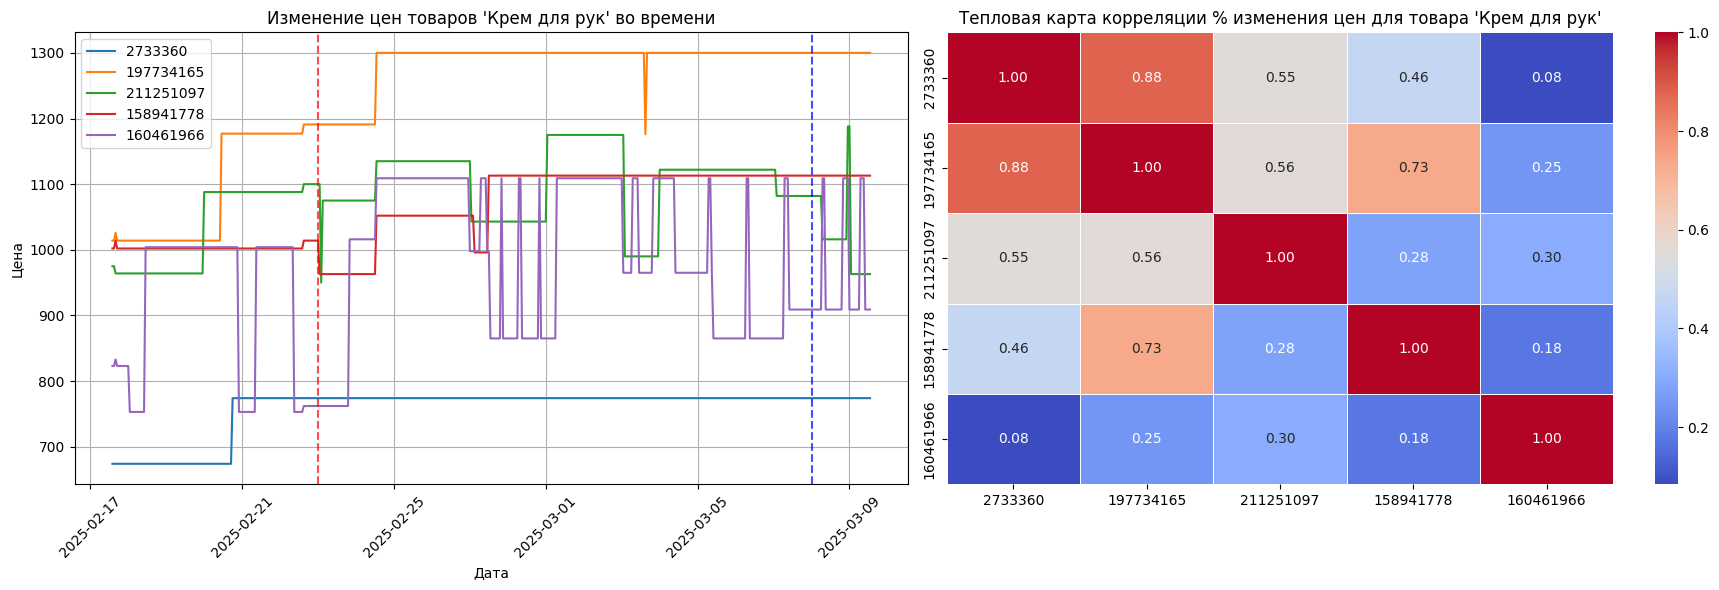

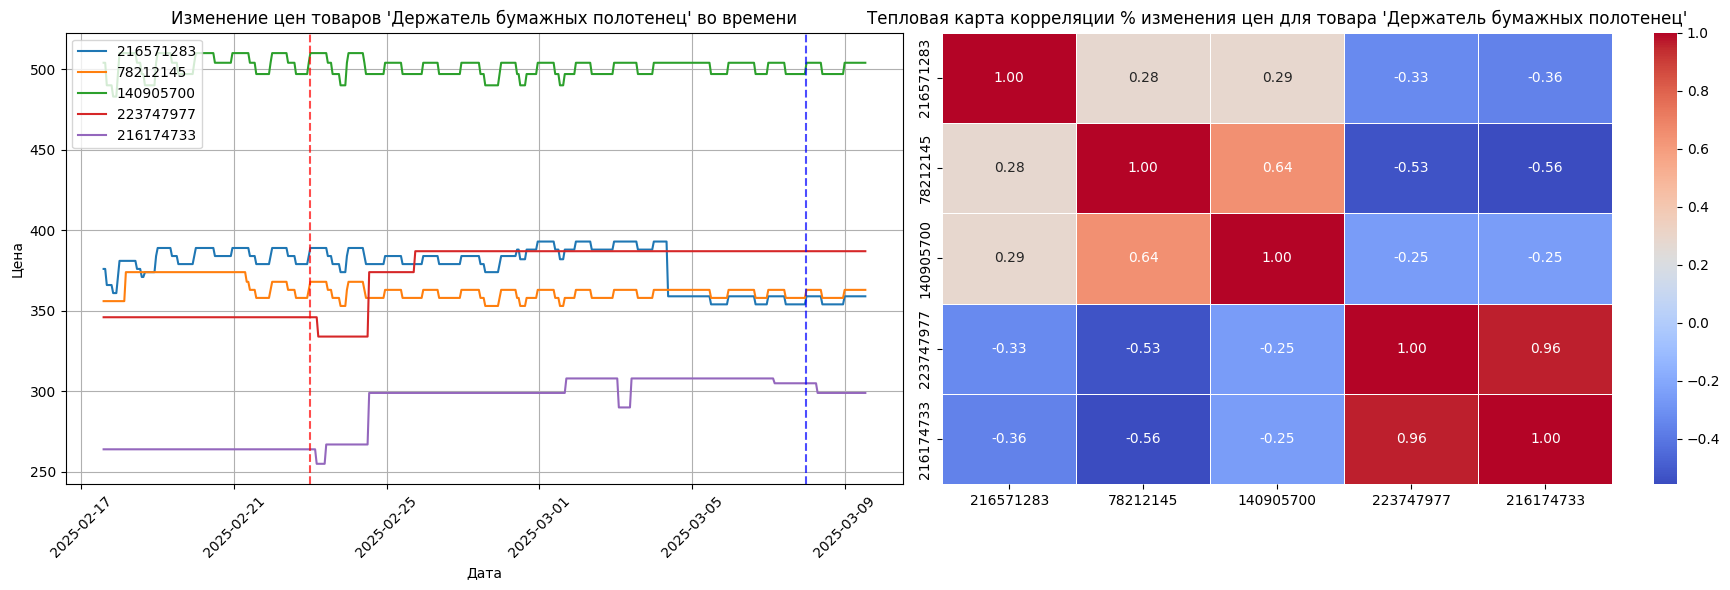

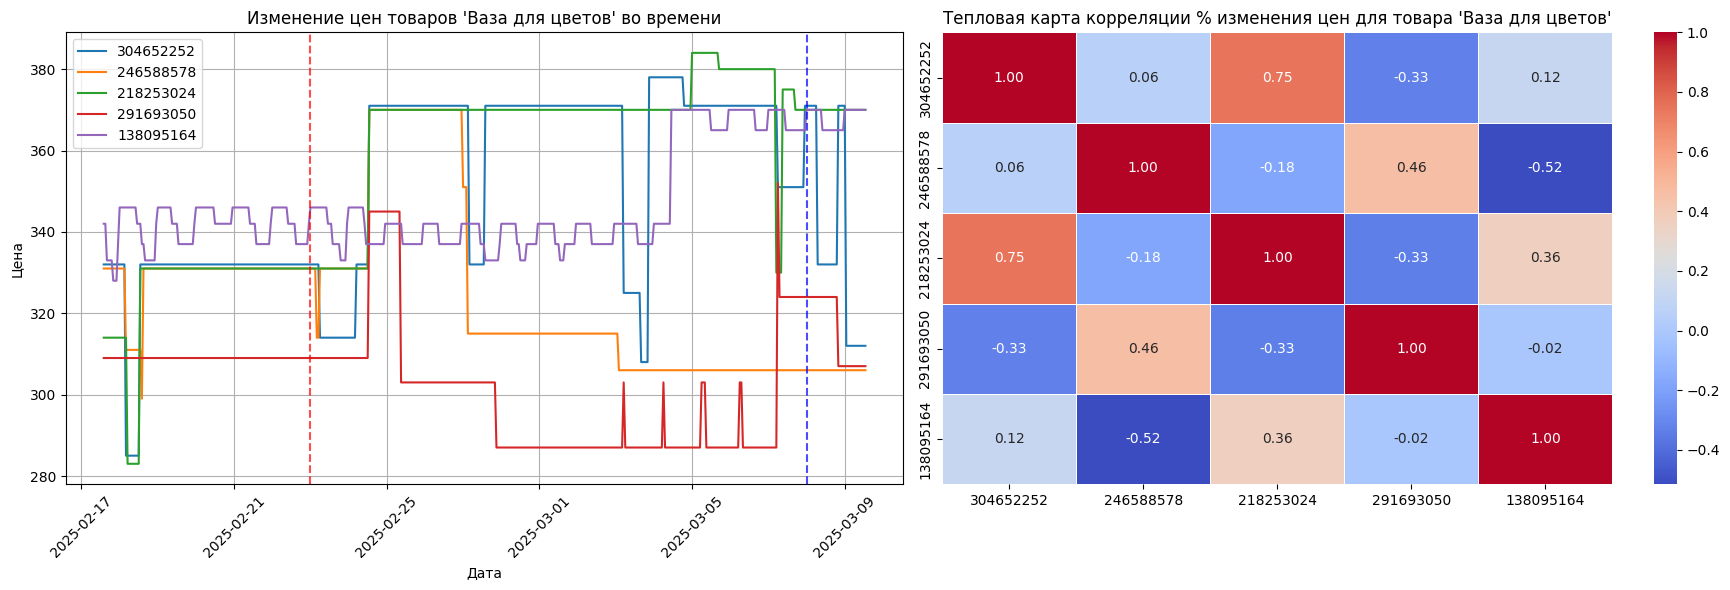

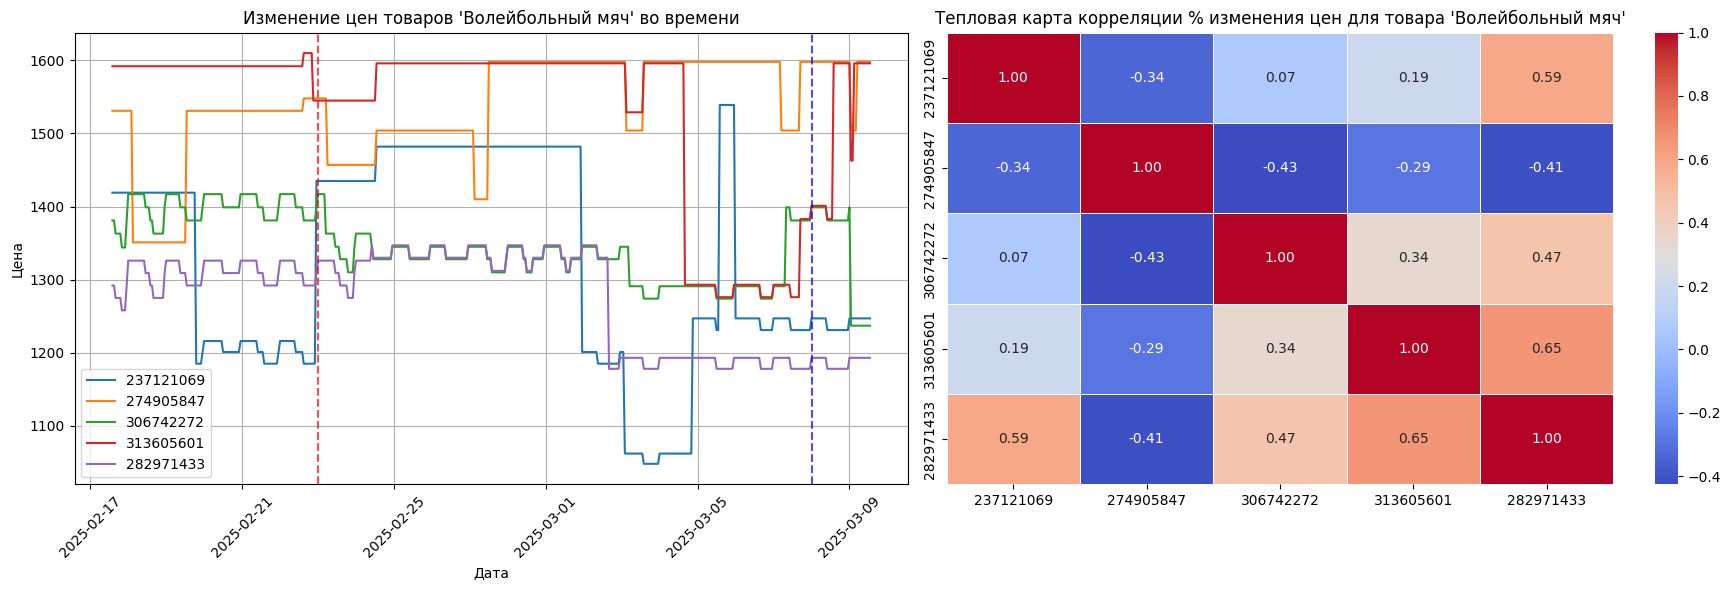

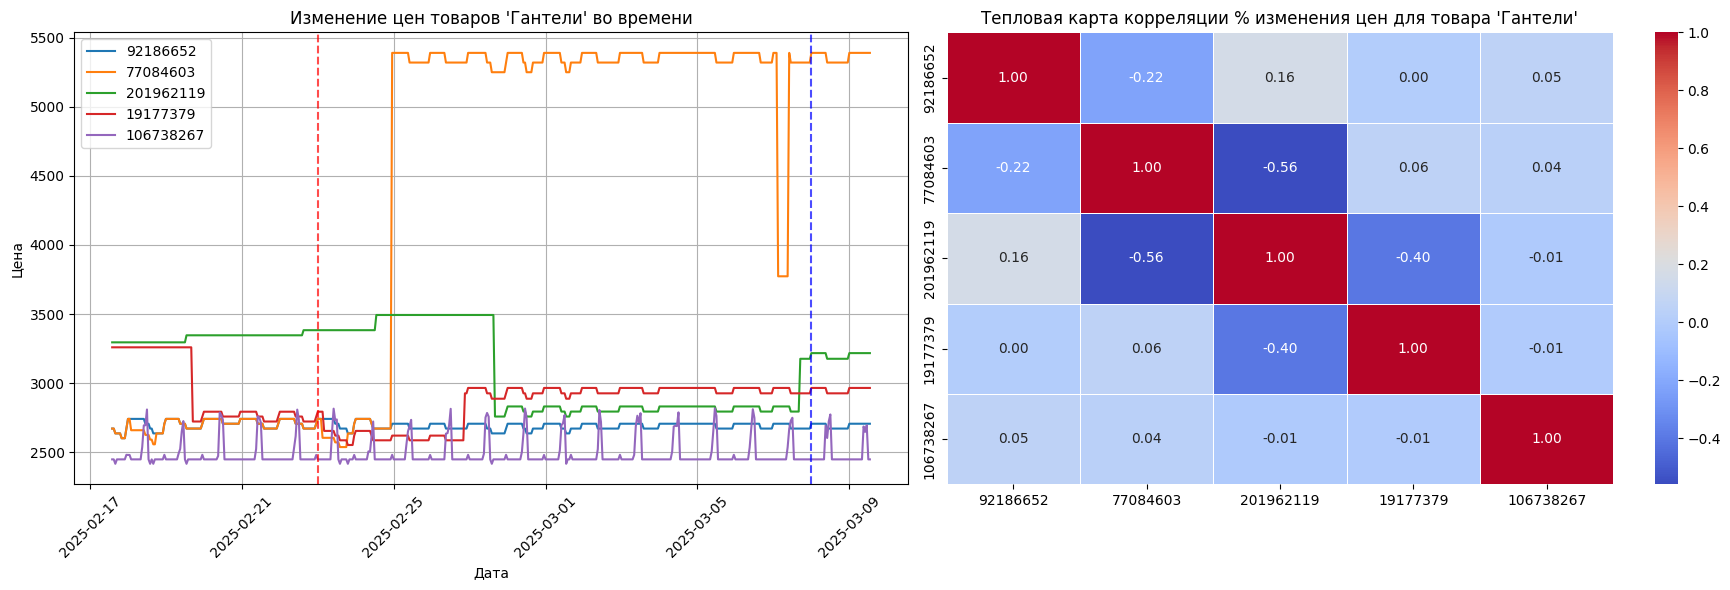

In [51]:
figsize = (18, 6)

for good in set(goods_columns):
    list_of_articuls_for_goods = list(df_catalog[df_catalog['Товар'] == good]['Артикул'])

    fig, axes = plt.subplots(1, 2, figsize=figsize)

    for product in list_of_articuls_for_goods:
        axes[0].plot(df.index, df[product], label=product)


    axes[0].axvline(pd.to_datetime('2025-02-23'), color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    axes[0].axvline(pd.to_datetime('2025-03-08'), color='blue', linestyle='--', linewidth=1.5, alpha=0.7)

    axes[0].set_xlabel("Дата")
    axes[0].set_ylabel("Цена")
    axes[0].set_title(f"Изменение цен товаров '{good}' во времени")
    axes[0].legend()
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid()

    corr_matrix = df[list_of_articuls_for_goods].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"Тепловая карта корреляции % изменения цен для товара '{good}'")

    plt.tight_layout()
    plt.show()

**Выводы:**
1) Большинство товаров показывают очень частые изменения цен, что может говорить о динамическом ценообразовании в зависимости от конкурентов
2) Некоторые товары действительно показывают синхронные изменения цен (например кроссовки, черная футболка, гель для бровей). Это может указывать на сговор между продавцами, поэтому стоит подробнее изучить нашу гипотезу
3) В периоды праздников в большинстве случаев не наблюдалось аномальных изменений цен, за некоторыми исключениями (например воллейбольный мяч)
4) Пропуски в тепловой карте означают, что цены за рассматриваемый период вообще не изменялись

Построим таблицу, где будем писать 0, если процентное изменение цены 0, и 1 в противном случае

In [52]:
df_change = df_percent_change.where(df_percent_change == 0, 1)
df_change.head()

277503519  278324976  248946359  306096104  255796969  \
Дата                                                                         
2025-02-17 15:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 16:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 17:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 18:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 19:00:00        0.0        0.0        0.0        0.0        0.0   

                     182404057  90116547   153088675  153203825  270872197  \
Дата                                                                         
2025-02-17 15:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 16:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 17:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 18:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 19:00:00        0.0        0.0        0.0        0.0        0.0   

                     ...  209240844  216291819  156970391  209242389  \
Дата                 ...                                               
2025-02-17 15:00:00  ...        0.0        0.0        0.0        0.0   
2025-02-17 16:00:00  ...        1.0        1.0        1.0        1.0   
2025-02-17 17:00:00  ...        0.0        0.0        0.0        0.0   
2025-02-17 18:00:00  ...        0.0        0.0        0.0        0.0   
2025-02-17 19:00:00  ...        0.0        0.0        0.0        0.0   

                     234136855  9391510    18364130   309985228  15396161   \
Дата                                                                         
2025-02-17 15:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 16:00:00        0.0        1.0        1.0        1.0        1.0   
2025-02-17 17:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 18:00:00        0.0        0.0        0.0        0.0        0.0   
2025-02-17 19:00:00        0.0        0.0        0.0        0.0        0.0   

                     126668875  
Дата                            
2025-02-17 15:00:00        0.0  
2025-02-17 16:00:00        1.0  
2025-02-17 17:00:00        0.0  
2025-02-17 18:00:00        0.0  
2025-02-17 19:00:00        0.0  

[5 rows x 145 columns]

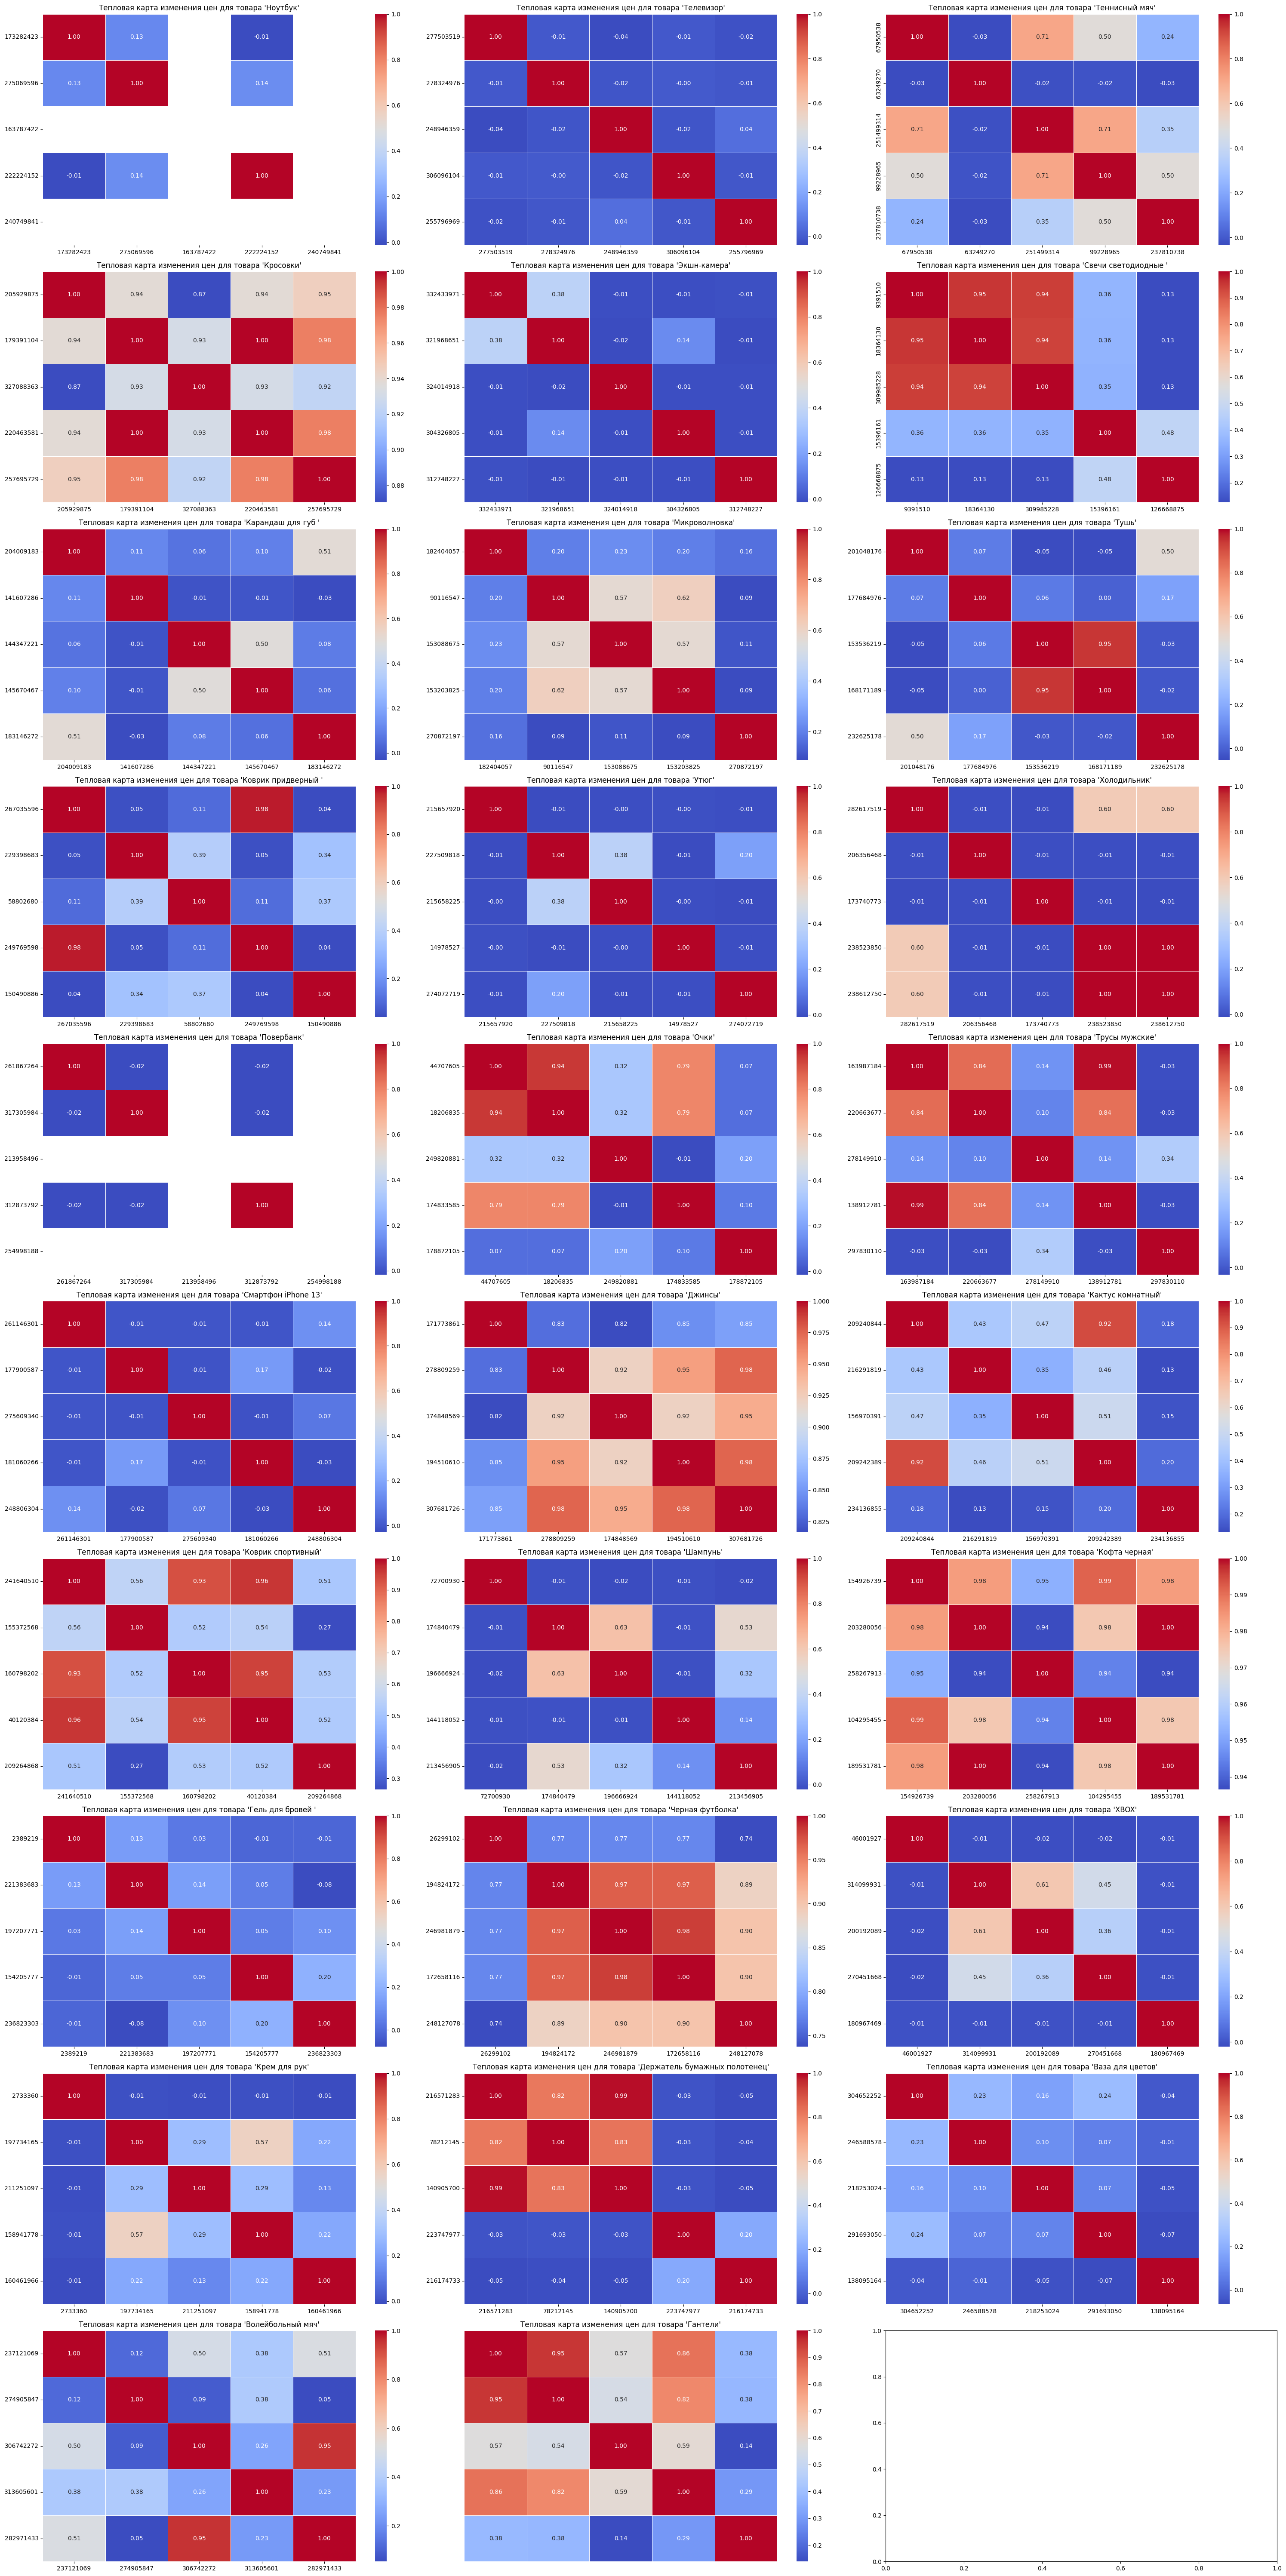

In [53]:
figsize = (30, 6)
rows = 10  # количество рядов 
cols = 3 # количество столбцов 

goods_list = list(set(goods_columns))


fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows))


for idx, good in enumerate(goods_list):
    list_of_articuls_for_goods = list(df_catalog[df_catalog['Товар'] == good]['Артикул'])

    row_idx = idx // cols
    col_idx = idx % cols


    ax = axes[row_idx, col_idx]

    corr_matrix = df_change[list_of_articuls_for_goods].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
    ax.set_title(f"Тепловая карта изменения цен для товара '{good}'")

   
    if idx == len(goods_list) - 1:  # если это последний график, то скрываем его
        ax.axis('off')
        
plt.tight_layout()
plt.show()


***Вывод:***
- При таком способе построения корреляция более сильная. Это объясняется тем, что нам важен сам факт изменения цены, а не величина изменения

## Шаг №6 - Проверка гипотезы

## Тест Грейнджера
Проведем тест Грейнджера.

Он помогает понять можно ли на основе одного временного ряда предсказать другой. 

Для этого в питоне есть специальная библиотека ***from statsmodels.tsa.stattools import grangercausalitytests***, которую мы будем использовать. 

**Гипотезы теста:**
- $H_0$ - второй ряд **не** предсказывает значения первого ряда
- $H_1$ - прошлые значения второго ряда оказывают значимое влияние на текущие значения первого ряда 

Далее для их подверждения или опровержения нужно смотреть на p-value. Если p-value < 0.05, то мы отрицаем гипотезу $H_0$ и делаем вывод, что изменения цен одного продавца влияют на цены другого продавца (то есть это не случайно)

**Предпосылки теста:**
1) Стационарность временных рядов
   - Мы посмотрели на график цен и поняли, что тренда нет, значит ряд стационарный 
2) Достаточность наблюдений (их более 400)
3) Правильное число лагов 
   - 5 часов, так как мы ищем кратковременные колебания


In [54]:
from statsmodels.tsa.stattools import grangercausalitytests # импортируем нужную библиотеку


depended_goods_list = []
for good in set(goods_columns):
    list_of_articuls_for_goods = list(df_catalog[df_catalog['Товар'] == good]['Артикул'])
    for i in range (5):
        for k in range (5): # перебираем все пары столбцов с ценами одного товара
            mean_p_value = 0 # здесь будем считать среднее p-value по лагам
            if i != k: # чтобы не сравнивать столбик с самим собой
                try:
                    results = grangercausalitytests(df[list_of_articuls_for_goods].iloc[:, [i, k]], maxlag=5, verbose=False)      
                    # Извлекаем p-value для каждого теста
                    for result in results.items():
                        mean_p_value += result[1][0]['lrtest'][1] # для того, чтобы посчитать среднее
                    # будем выводить средние p-value только когда оно меньше 0.05 и когда найденная ранее корреляция больше 0.7 (то есть когда она высокая)
                    if ( mean_p_value/5 < 0.05 ) and df_change[list_of_articuls_for_goods[i]].corr(df_change[list_of_articuls_for_goods[k]]) > 0.7: 
                        print(f'likelihood ratio test mean: {mean_p_value/5}',list_of_articuls_for_goods[i], list_of_articuls_for_goods[k], str(df_catalog[df_catalog['Артикул'] == list_of_articuls_for_goods[k]]['Товар']) )
                        depended_goods_list.append(list_of_articuls_for_goods[i])
                        depended_goods_list.append(list_of_articuls_for_goods[k])
                except:
                    pass

print(*set(depended_goods_list), sep='\n')

likelihood ratio test mean: 3.3501170010213262e-06 251499314 67950538 55    Теннисный мяч
Name: Товар, dtype: object
likelihood ratio test mean: 2.7335473156812576e-06 251499314 99228965 58    Теннисный мяч
Name: Товар, dtype: object
likelihood ratio test mean: 0.008427867329082323 205929875 179391104 106    Кросовки
Name: Товар, dtype: object
likelihood ratio test mean: 0.008166099991046519 205929875 220463581 108    Кросовки
Name: Товар, dtype: object
likelihood ratio test mean: 0.011536408332988036 327088363 179391104 106    Кросовки
Name: Товар, dtype: object
likelihood ratio test mean: 0.011649662061952896 327088363 220463581 108    Кросовки
Name: Товар, dtype: object
likelihood ratio test mean: 0.0025002975704048252 9391510 18364130 141    Свечи светодиодные 
Name: Товар, dtype: object
likelihood ratio test mean: 0.0010962216749091495 153536219 168171189 28    Тушь
Name: Товар, dtype: object
likelihood ratio test mean: 0.0026576159517740787 267035596 249769598 133    Коврик придв

Теперь мы хотим проверить графики на наличие структурных сдвигов. Структурный сдвиг — это изменение в процессе или данных, которое влияет на поведение исследуемой системы или переменной. В контексте анализа временных рядов структурный сдвиг означает изменение в закономерностях или трендах данных, которое приводит к нарушению стабильности или предсказуемости этих данных. Мы хотели проверить данные на наличие структурных сдвигов с помощью теста Чоу и кумулятивной суммы. 

Рассмотрев предпосылки теста Чоу мы поняли, что не сможет применить тест в наших данных. 

Предпосылка, которая нарушается: Линейная зависимость цен от времени (приблизительно). Если мы посмотрим на графики зависимости цен товаров от времени, то видно, что линейной зависимости цен нет, т.е. тест Чоу не подходит для анализа, так как предпосылка не выполняется


Далее мы решили определить наличие сдвигов с помощью кумулятивной суммы (CUSUM), у которого из предпосылок: 

Данные должны представлять собой стационарный процесс (выполняется, можем посмотреть на те же графики);

Равномерное распределение ошибок; (Выполняется, см выше тест гренджера)


Справка: Стационарность или постоянство — свойство процесса не менять свои характеристики со временем. Понятие используется в нескольких разделах науки. Стационарный процесс — это стохастический процесс, у которого не изменяется распределение вероятности при смещении во времени.

Проведем тест на наличие структурных сдвигов и выведем товары, которые им подверженны и выведем такие товары внизу списком.

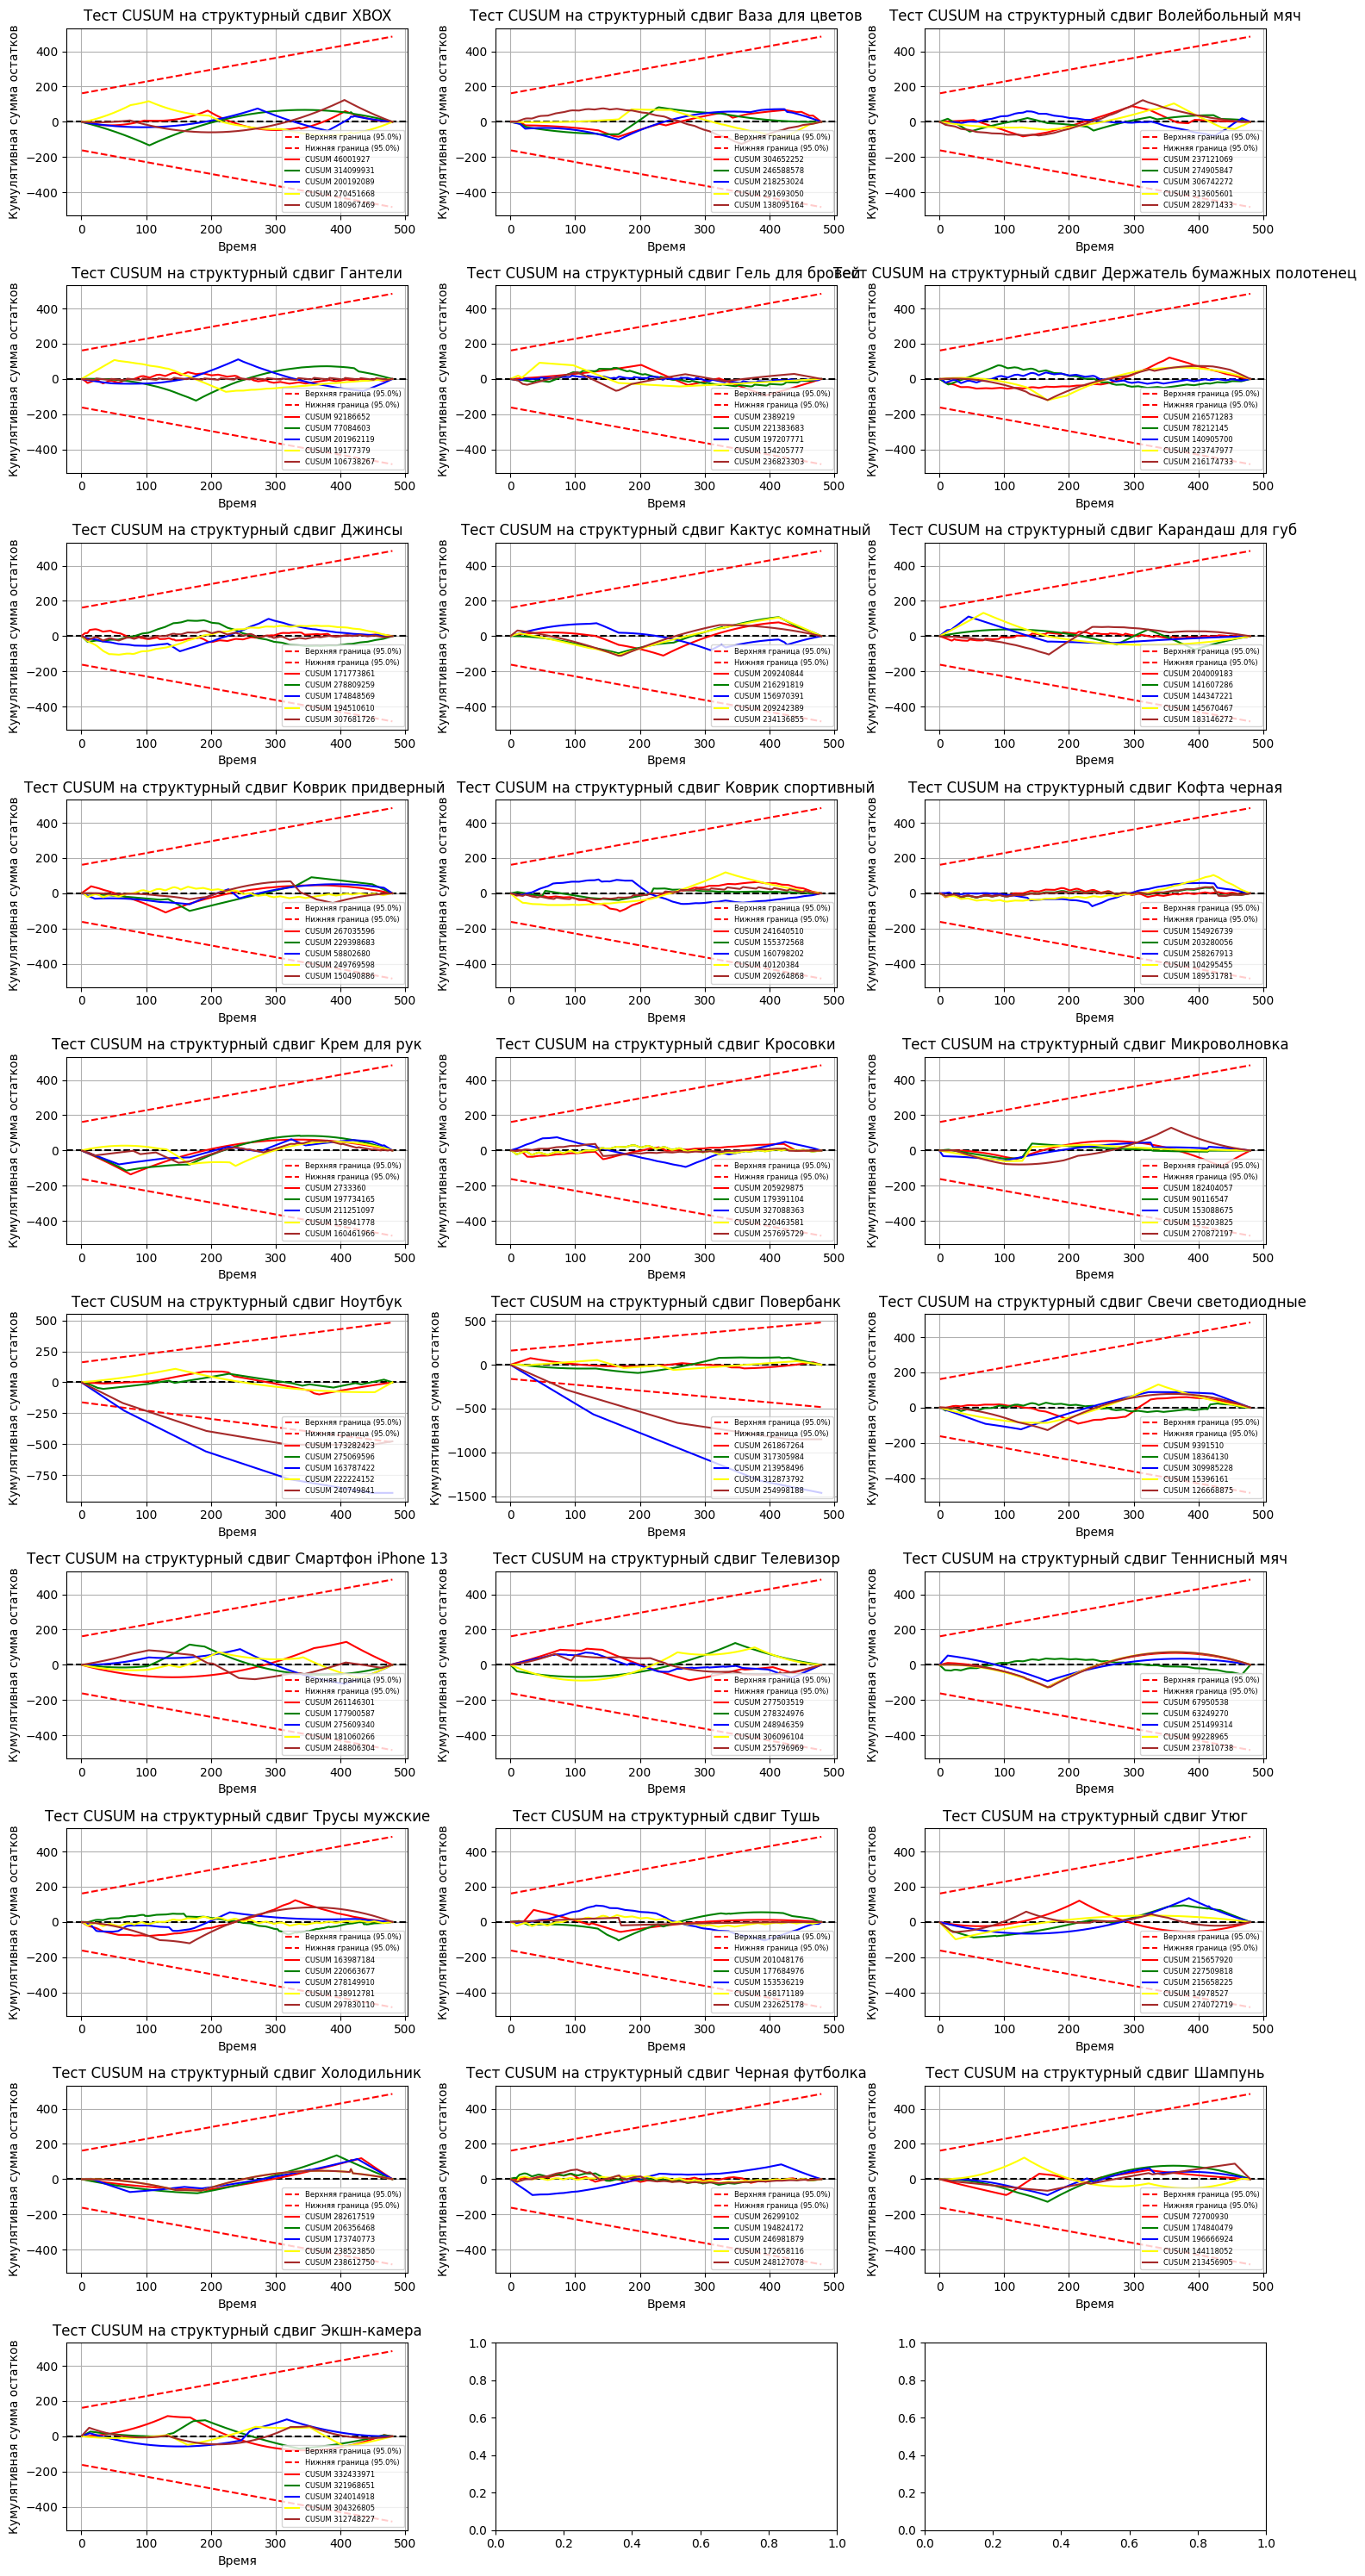

('Гантели', 106738267)
('Гель для бровей\xa0', 197207771)
('Карандаш для губ\xa0', 204009183)
('Свечи светодиодные ', 18364130)
('Трусы мужские', 138912781)
('Тушь', 232625178)
('Черная футболка', 26299102)
('Черная футболка', 172658116)


In [55]:
# Подготовка списка цветов
colors = cycle(['red', 'green', 'blue', 'yellow', 'brown'])
answ = []

# Параметры для расчета доверительных границ
alpha = 0.05
c = -2 * np.log(-np.log(1 - alpha / 2))

a = set(df_catalog['Товар'])
a.remove('Очки')  # Не будем анализировать "Очки" из-за проблем с данными

fig, axes = plt.subplots(10, 3, figsize=(15, 30))  # 10 строк, 3 столбца
axes = axes.flatten() 

counter = 0
for j in sorted(a):
    ax = axes[counter]

    time = np.arange(1, len(df) + 1) 
    n = len(time)
    upper_bound = c * np.sqrt(n) + 2 * c * time / np.sqrt(n)
    lower_bound = -upper_bound

    ax.plot(time, upper_bound, "r--", label=f"Верхняя граница ({100 - alpha*100}%)")
    ax.plot(time, lower_bound, "r--", label=f"Нижняя граница ({100 - alpha*100}%)")
    ax.axhline(0, color="black", linestyle="--")

    ax.set_xlabel("Время")
    ax.set_ylabel("Кумулятивная сумма остатков")
    ax.set_title(f"Тест CUSUM на структурный сдвиг {j}")
    ax.grid(True)
    
    for i in df_catalog[df_catalog['Товар'] == j]['Артикул']:
        tv_data = df[i]
        tv_data_reset = tv_data.reset_index()
        tv_data_reset["Time"] = np.arange(len(tv_data_reset)) 

        X = sm.add_constant(tv_data_reset["Time"])
        y = tv_data_reset[i] 

        model = sm.OLS(y, X).fit()  # Линейная регрессионная модель методом наименьших квадратов ("Это типо машинка поставьте баллов пожалуйста :)")

        cusum_result = breaks_cusumolsresid(model.resid)
        stat, p_value, crit_values = cusum_result

        # Интерпретация результата
        if p_value > 0.05:
            answ.append((j, i))

        n = len(model.resid)
        cusum = np.cumsum(model.resid) / model.resid.std()
        time = np.arange(1, n + 1)  # Ось времени будет представлять последовательные значения (1, 2, 3, ...)

        upper_bound = c * np.sqrt(n) + 2 * c * time / np.sqrt(n)
        lower_bound = -upper_bound

        color = next(colors)
        ax.plot(time, cusum, label=f"CUSUM {i}", color=color)

    ax.legend(fontsize=6, loc='lower right')

    counter += 1

plt.tight_layout()
plt.show()

# Выводим список зависимых товаров
print(*answ, sep='\n')

То есть мы можем обьяснить наличие зависимотси между некоторыми товарами с помощью структурных сдвигов. Уберем такие товары из списка зависимых.

In [56]:
depended_goods_set = set(depended_goods_list)
print(len(depended_goods_set))
for i in answ:
    if int(i[1]) in depended_goods_set:
        depended_goods_set.remove(int(i[1]))

print(len(depended_goods_set))

35
32


Теперь определим из каких категорий и типов товаров товары, которые по нашему мнения являются зависимыми. 

In [57]:
for art in depended_goods_set:
    print(df_catalog[df_catalog['Артикул'] == art]['Товар'].iloc[0], df_catalog[df_catalog['Артикул'] == art]['Категория'].iloc[0])


Кросовки Одежда
Кофта черная Одежда
Холодильник Бытовая техника
Джинсы Одежда
Кросовки Одежда
Кофта черная Одежда
Держатель бумажных полотенец Товары для дома
Свечи светодиодные  Товары для дома
Кофта черная Одежда
Теннисный мяч Спортивные товары
Джинсы Одежда
Джинсы Одежда
Очки Спортивные товары
Теннисный мяч Спортивные товары
Тушь Косметика
Джинсы Одежда
Джинсы Одежда
Коврик спортивный Спортивные товары
Теннисный мяч Спортивные товары
Холодильник Бытовая техника
Коврик придверный  Товары для дома
Тушь Косметика
Кросовки Одежда
Держатель бумажных полотенец Товары для дома
Кросовки Одежда
Черная футболка Одежда
Трусы мужские Одежда
Очки Спортивные товары
Черная футболка Одежда
Коврик спортивный Спортивные товары
Трусы мужские Одежда
Коврик придверный  Товары для дома


Приведем это к чуть более структурированному виду. 

In [58]:
categories = []

for art in depended_goods_set:
    category = df_catalog[df_catalog['Артикул'] == art]['Категория'].iloc[0] 
    categories.append(category)  # Добавляем категорию в список

category_counts = pd.Series(categories).value_counts()

print(category_counts)


Одежда               16
Спортивные товары     7
Товары для дома       5
Бытовая техника       2
Косметика             2
Name: count, dtype: int64


# Выводы:

### Потенциальные признаки использования алгоритмических роботов или сговора:
Высокая частота синхронных изменений цен в категориях Одежда и Спортивные товары может указывать на высокую вероятность использования алгоритмических роботов для ценообразования. Эти роботы часто следят за ценами конкурентов и автоматически корректируют цены, чтобы оставаться конкурентоспособными. 

## Частота синхронных изменений цен по категориям:

### Одежда: 64%
16 случаев из 25 синхронных изменений цен (64%), что является наибольшим числом среди всех категорий. Это может указывать на высокую конкуренцию на рынке одежды, на большой спрос на данную категорию товаров, а также на возможное использование алгоритмических роботов для динамического ценообразования.

### Спортивные товары: 28% 
7 случаев из 25 - 28%. Это может указывать на меньшую конкурентность этого сектора.

### Товары для дома: 20%
5 случаев из 25 - 20%. Это указывает на возможное влияние синхронных изменений, но в меньшей степени, чем в предыдущих категориях.

### Бытовая техника: 10%
2 случая из 20 - 10%. Здесь число меньше, что может свидетельствовать о менее интенсивной динамике ценообразования. Скорее всего это связано с высокой ценой на данную группу товаров и небольшим количством покупок. Веротятно, что изменение цен происходит медленнее и в более долгосрочном периоде. Это можно проверить в более крупном исследовании. Для более подробного ответа необходимо дополнительно исследование с другими данными.

### Косметика: 8%
2 случая из 25 - 8%. Как и с бытовой техникой, это может означать более стабильную ценовую политику. Но вероятно это связано с крупными магазинами типо "Золотого яблока", которое практически монополизировало рынок косметики и убило спрос на маркетплейсе. Для более подробного ответа необходимо дополнительно исследование с другими данными.

### Гаджеты и техника: 0%
0 случаев из 25 - 0%. Данные товары вообще не попали. Это тоже может означать более стабильную ценовую политику. Скорее всего частое изменение цен и применение алгоритмических стратегий не требуется, так как цены на гаджеты и технику слишком высокие (возможно даже переоценены) из-за этого на такую категорию товаров спрос небольшой. Также это может быть из-за большой конкуренции с крупными ретейлами, как М.Видео и Эльдорадо и недоверием к продавцам на маркетплейсах. Для более подробного ответа необходимо дополнительно исследование с другими данными.

# Заключение:
Синхронные изменения цен в категориях Одежда и Спортивные товары дают основания предположить, что в этих сегментах могут использоваться алгоритмические роботы для динамического ценообразования, особенно учитывая, что такие категории подвержены интенсивной конкуренции.
Для Одежды это может также быть индикатором того, что на рынке присутствуют несколько крупных игроков, которые следят за ценами друг друга и изменяют их синхронно, что может быть проявлением олигополистического сговора.